### INIT

In [84]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
import pickle
from matplotlib import cm
from tqdm.notebook import tqdm
import torch
import random
from itertools import product
from itertools import combinations
import collections
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import torch
import torch.nn as nn
import yaml
from collections import Counter
import math
from matplotlib.patches import Polygon
from scipy.optimize import curve_fit
from utils.topology import NetworkTopology, get_msg_graph
import shutil
import warnings
from networkx.utils import py_random_state
warnings.filterwarnings('ignore')
import json
from scipy.sparse import coo_matrix

def degree(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())
    return degree_sequence, deg, cnt

def func(x, a, b, c):
    return a * (x-b)**2 + c

def save_fig(f, name):
    f.savefig(name, bbox_inches='tight')

### Metalearning

In [102]:
import json

with open('/Volumes/Mac/Dropbox/modular-metalearning-master/neurips2019/nri_structure.json', 'r') as infile:
    graph = json.load(infile)
for i in graph.keys():
    print(i, graph[i])

nodes [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
node_dim 4
type_modules affine-260-256-256-256-4,relu-8-256-256-256
initial_input pusher
self_regress True
edges [[0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 3], [2, 4], [3, 0], [3, 1], [3, 2], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3]]
num_steps 10
update_sz 4
final_module False
msg_sz 256
type complete


In [108]:
graph['type_modules'] = 'affine-4-4-4,relu-4-4-4'


with open('/Volumes/Mac/Dropbox/modular-metalearning-master/neurips2019/my_structure.json', 'w', encoding='utf-8') as make_file:
    json.dump(graph, make_file, indent="\t")


In [109]:
with open('/Volumes/Mac/Dropbox/modular-metalearning-master/neurips2019/my_structure.json', 'r') as infile:
    graph = json.load(infile)
for i in graph.keys():
    print(i, graph[i])

nodes [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
node_dim 4
type_modules affine-4-4-4,relu-4-4-4
initial_input pusher
self_regress True
edges [[0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 3], [2, 4], [3, 0], [3, 1], [3, 2], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3]]
num_steps 10
update_sz 4
final_module False
msg_sz 256
type complete


### NULL

In [36]:
topology_list = [
 'ladder',
 'star',
 'path',
 #'binarytree',
 'cycle',
 #'grid',
 'circladder',
 'cylinder',
 'torus',
 'trikite',
 'trilattice',
 #'trigrid',
 'lollipop',
 'wheel',
 'barbell646',
 'barbell808',
 'bipartite',
 #'complete'
  ]

graph_list = []
for tt in topology_list:
    topology = NetworkTopology(num_nodes=16, seed=0)#
    G, W = topology.generate(topology=tt)
    graph_list.append(G)
    

In [37]:
len(topology_list)

14

In [94]:
result = list(combinations(topology_list,5))
graph_choice = random.sample(result, 100)

topology = NetworkTopology(num_nodes=16, seed=0)#
seed_test = 0
for add_topo in ['grid', 'binarytree', 'trigrid', 'complete']:
    for graphs in graph_choice:
        G_list = []
        complete_graphs = list(graphs)
        complete_graphs.append(add_topo)
        complete_graphs = random.sample(complete_graphs, 6)
        for idx, tt in enumerate(complete_graphs):
            G, W = topology.generate(topology=tt)
            mapping = dict(zip(G, [i+16*idx for i in range(len(G.nodes()))]))
            G = nx.relabel_nodes(G, mapping)
            G_list.append(G)
            
        path1 = nx.path_graph(2)
        mapping = dict(zip(path1, [i + 15 for i in range(len(path1.nodes()))]))
        path1 = nx.relabel_nodes(G, mapping)
        
        path2 = nx.path_graph(2)
        mapping = dict(zip(path2, [i + 31for i in range(len(path2.nodes()))]))
        path2 = nx.relabel_nodes(path2, mapping)
        
        path3 = nx.path_graph(2)
        mapping = dict(zip(path3, [i + 47 for i in range(len(path3.nodes()))]))
        path3 = nx.relabel_nodes(path3, mapping)
        
        path4 = nx.path_graph(2)
        mapping = dict(zip(path4, [i + 63 for i in range(len(path4.nodes()))]))
        path4 = nx.relabel_nodes(path4, mapping)
        
        path5 = nx.path_graph(2)
        mapping = dict(zip(path5, [i + 79 for i in range(len(path5.nodes()))]))
        path5 = nx.relabel_nodes(path5, mapping)
        
        
        G = nx.compose(G_list[random_idx[0]],path1)
        
        G = nx.compose(G,G_list[random_idx[1]])
        G = nx.compose(G,path2)
        
        G = nx.compose(G,G_list[random_idx[2]])
        G = nx.compose(G,path3)
        
        G = nx.compose(G,G_list[random_idx[3]])
        G = nx.compose(G,path4)
        
        G = nx.compose(G,G_list[random_idx[4]])
        G = nx.compose(G,path5)
        
        G = nx.compose(G,G_list[random_idx[5]])
        
        npr = np.random.RandomState(seed=seed_test)
        J = npr.normal(0, 0.3, size=[96,96])
        J = (J + J.transpose()) / 2.0
        W = nx.adjacency_matrix(G).todense()
        J = J * np.array(W)
        b = npr.normal(0, 0.25, size=[96, 1])
    
        
        graph = {}
        graph['J'] = coo_matrix(J)  # shape N X N
        graph['b'] = b  # shape N x 1
        graph['seed_test'] = seed_test
        graph['stdJ'] = 0.3
        graph['stdb'] = 0.25
        
        graph_name = [i[:3] for i in complete_graphs]
        graph_name = ",".join(graph_name)
        print(graph_name)
        with open("data_temp/test_100_0.3_multigraph/graph_n96_{}_{}.p".format(graph_name, seed_test), "wb") as f:
            pickle.dump(graph, f)
        seed_test+=1
        
        

gri,cyc,cir,tri,whe,lol
bar,tri,sta,lad,gri,cir
lol,bar,tri,whe,gri,bar
cir,sta,tri,bar,gri,tor
whe,tri,cyl,cir,tor,gri
gri,cyl,tri,tor,bar,bip
tri,gri,whe,tor,sta,cyl
gri,bar,bar,pat,tor,tri
sta,cyc,tri,gri,bar,bar
bar,tri,sta,pat,gri,bip
lad,tor,pat,gri,tri,bar
bar,tri,cir,gri,tri,cyc
cyc,gri,bar,bip,pat,lad
gri,lad,bip,lol,tor,cir
gri,tri,bar,cyc,cyl,bar
lad,tri,tri,gri,bip,whe
tri,bar,tor,bip,bar,gri
tor,gri,bar,cyl,lol,cir
tri,gri,cyl,bar,tor,whe
cir,whe,gri,tri,tri,lad
lol,gri,cyc,whe,bip,cir
gri,tri,cyc,pat,tor,cir
lol,cyc,tri,pat,cyl,gri
gri,bip,tri,pat,lad,tri
bar,tri,whe,gri,lol,cyc
lol,bip,gri,bar,cir,bar
gri,sta,pat,bip,bar,tor
gri,tri,lad,cir,lol,bar
cir,lad,whe,bar,gri,tor
whe,tor,bip,pat,tri,gri
tri,cyc,gri,whe,bar,sta
tri,lad,gri,whe,bip,bar
gri,cyl,tri,tor,lol,lad
sta,bip,lol,gri,cyc,tri
sta,whe,lol,lad,bar,gri
sta,cir,cyc,gri,tri,pat
gri,lol,whe,bar,pat,sta
cir,gri,cyc,lol,whe,bar
sta,cyc,tri,lol,gri,whe
whe,lad,gri,bar,tri,tri
lad,bar,tri,lol,cyc,gri
whe,tri,lad,tri,

pat,whe,lol,cir,tri,com
cyl,lol,tor,lad,cir,com
bar,lol,com,sta,bip,tor
tri,com,tri,lol,cyl,bar
bar,bip,cir,cyc,com,bar
lad,cyl,bar,tor,cyc,com
tri,cyl,com,bip,bar,tor
sta,com,cyc,cir,tri,tor
lad,pat,tor,whe,com,bip
tri,cir,bar,com,tri,tor
bar,tri,com,tor,whe,sta
sta,tri,whe,bar,com,lol
tor,pat,cyc,cir,com,lol
cyl,com,cir,tri,bar,lol
whe,cir,cyl,cyc,bar,com
cyl,tor,sta,tri,cyc,com
com,cir,tor,tri,whe,bar
cir,bar,pat,lol,com,lad
bar,sta,com,tri,cyc,cyl
bar,com,cyl,pat,cir,tri
bip,com,lol,bar,cir,cyl
cyc,cyl,lol,com,whe,pat
bip,bar,sta,com,cir,lad
bip,lad,com,cyc,sta,tor
tri,com,bip,bar,tri,cyl
whe,bar,bar,cir,bip,com
tri,bar,sta,whe,com,pat
tri,cyl,sta,tor,bip,com
cyc,lad,pat,com,bip,tri
tor,com,lol,cyc,cyl,whe
lad,tri,com,bip,tor,cyl
com,whe,bip,lad,tri,tor
cyc,bip,tri,com,pat,lad
pat,bar,com,sta,bar,lol
bip,tor,com,pat,bar,cir
tor,com,lol,tri,tri,lad
cyl,com,cir,cyc,whe,tor
tri,whe,bip,sta,tri,com
tor,tri,cir,bar,tri,com
lol,bar,tor,lad,cyc,com
tri,lad,bar,pat,whe,com
tor,tri,cyc,cyl,

In [27]:
path = "data_temp/WS_flex_graph_100_bimodal_regen.p"
data = pickle.load(open(path, "rb"))

X_low = np.array(data['X_low'])
name_list = np.array(data['name_list'])
prop_list = np.array(data['prop_list'])

min_z = min(X_low[:3600000, 2])
max_z = max(X_low[:3600000, 2])
min_x = min(X_low[:3600000, 0])
max_x = max(X_low[:3600000, 0])
min_y = min(X_low[:3600000, 1])
max_y = max(X_low[:3600000, 1])

idx_list = []
for idx, i in tqdm(enumerate(X_low)):
    if min_z <= i[2] <= max_z:
        idx_list.append(idx)

new_X_low = X_low[idx_list]
new_name_list = name_list[idx_list]
new_prop_list = prop_list[idx_list]

d = {}
d['X_low'] = new_X_low
d['name_list'] = new_name_list
d['prop_list'] = new_prop_list

with open(r"C:\Users\mokss\Dropbox\TorchGNN_project\data_temp\WS_flex_graph_100_bimodal_same_plane.p", "wb") as f:
    pickle.dump(d, f)

-5.030169012832796 3.845218285611315


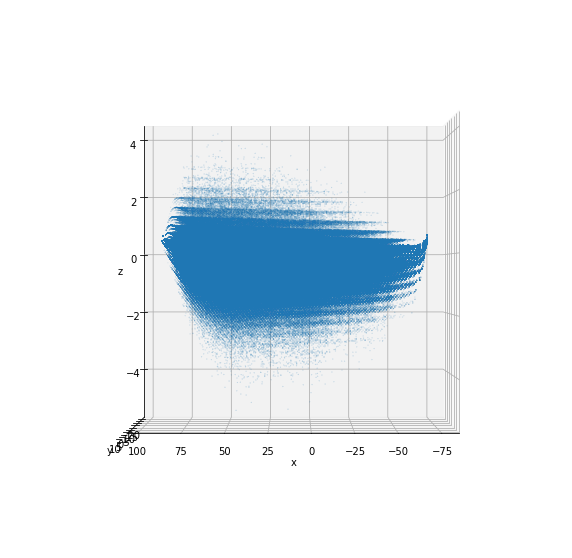

In [28]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_X_low[:3600000,0], new_X_low[:3600000,1], new_X_low[:3600000,2], s=0.01)
elev = 0
azim = 90
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)
print(min(new_X_low[:3600000,2]), max(new_X_low[:3600000,2]))

-5.030169012832796 3.845218285611315
-5.030169012832796 3.845218285611315


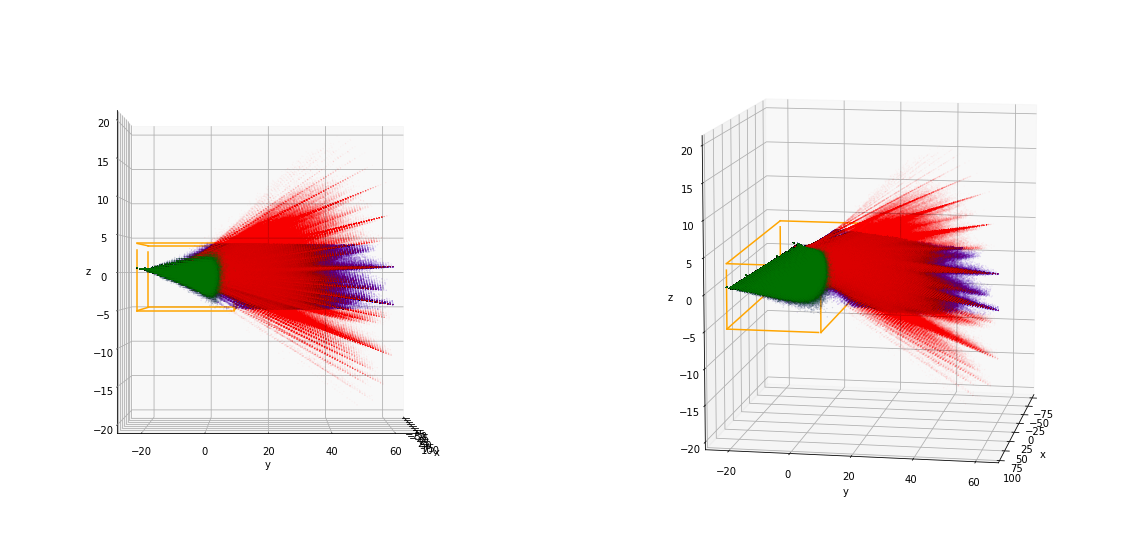

In [29]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(new_X_low[:,0], new_X_low[:,1], new_X_low[:,2], s=0.1, color='blue', alpha=0.1)
ax.scatter(X_low[:,0], X_low[:,1], X_low[:,2], s=0.05, color='red', alpha=0.05)
ax.scatter(X_low[:3600000,0], X_low[:3600000,1], X_low[:3600000,2], s=0.1, color='green', alpha=0.1)

elev = 0
azim = 0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)
print(min(new_X_low[:,2]), max(new_X_low[:,2]))

lenx = len(np.arange(min_x, max_x))
leny = len(np.arange(min_y, max_y))
lenz = len(np.arange(min_z, max_z))

ax.plot(np.arange(min_x, max_x), [min_y for i in range(lenx)], [min_z for i in range(lenx)], color='orange')
ax.plot(np.arange(min_x, max_x), [min_y for i in range(lenx)], [max_z for i in range(lenx)], color='orange')
ax.plot(np.arange(min_x, max_x), [max_y for i in range(lenx)], [min_z for i in range(lenx)], color='orange')
ax.plot(np.arange(min_x, max_x), [max_y for i in range(lenx)], [max_z for i in range(lenx)], color='orange')

ax.plot([min_x for i in range(lenz)], [min_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')
ax.plot([min_x for i in range(lenz)], [max_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')
ax.plot([max_x for i in range(lenz)], [min_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')
ax.plot([max_x for i in range(lenz)], [max_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')

ax.plot([min_x for i in range(leny)], np.arange(min_y, max_y), [min_z for i in range(leny)], color='orange')
ax.plot([min_x for i in range(leny)], np.arange(min_y, max_y), [max_z for i in range(leny)], color='orange')
ax.plot([max_x for i in range(leny)], np.arange(min_y, max_y), [min_z for i in range(leny)], color='orange')
ax.plot([max_x for i in range(leny)], np.arange(min_y, max_y), [max_z for i in range(leny)], color='orange')

##########################################################################

ax = fig.add_subplot(122, projection='3d')
ax.scatter(new_X_low[:,0], new_X_low[:,1], new_X_low[:,2], s=0.1, color='blue', alpha=0.1)
ax.scatter(X_low[:,0], X_low[:,1], X_low[:,2], s=0.05, color='red', alpha=0.05)
ax.scatter(X_low[:3600000,0], X_low[:3600000,1], X_low[:3600000,2], s=0.1, color='green', alpha=0.1)

elev = 10
azim = 10
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)
print(min(new_X_low[:,2]), max(new_X_low[:,2]))

lenx = len(np.arange(min_x, max_x))
leny = len(np.arange(min_y, max_y))
lenz = len(np.arange(min_z, max_z))

ax.plot(np.arange(min_x, max_x), [min_y for i in range(lenx)], [min_z for i in range(lenx)], color='orange')
ax.plot(np.arange(min_x, max_x), [min_y for i in range(lenx)], [max_z for i in range(lenx)], color='orange')
ax.plot(np.arange(min_x, max_x), [max_y for i in range(lenx)], [min_z for i in range(lenx)], color='orange')
ax.plot(np.arange(min_x, max_x), [max_y for i in range(lenx)], [max_z for i in range(lenx)], color='orange')

ax.plot([min_x for i in range(lenz)], [min_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')
ax.plot([min_x for i in range(lenz)], [max_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')
ax.plot([max_x for i in range(lenz)], [min_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')
ax.plot([max_x for i in range(lenz)], [max_y for i in range(lenz)], np.arange(min_z, max_z), color='orange')

ax.plot([min_x for i in range(leny)], np.arange(min_y, max_y), [min_z for i in range(leny)], color='orange')
ax.plot([min_x for i in range(leny)], np.arange(min_y, max_y), [max_z for i in range(leny)], color='orange')
ax.plot([max_x for i in range(leny)], np.arange(min_y, max_y), [min_z for i in range(leny)], color='orange')
ax.plot([max_x for i in range(leny)], np.arange(min_y, max_y), [max_z for i in range(leny)], color='orange')


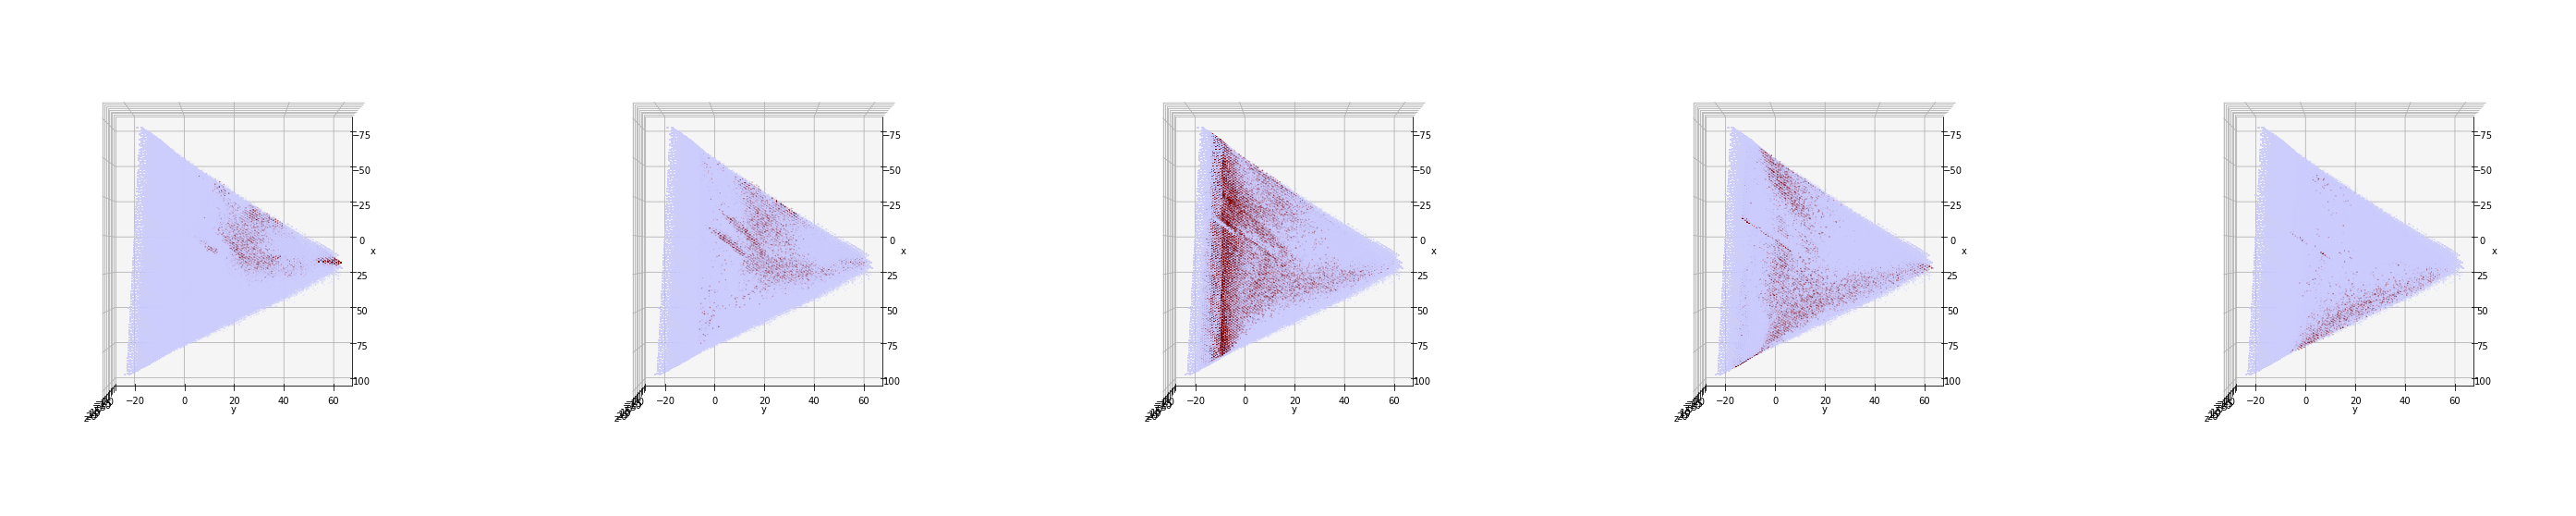

In [30]:
tik = max_z-min_z
size=0.1

white = plt.cm.seismic(np.ones(20)*0.45)
upper = plt.cm.seismic(np.ones(20))
white = plt.cm.seismic(np.ones(20)*0.45)
colors = np.vstack((white, upper, white))
tmap = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map_white', colors)

fig = plt.figure(figsize = (60,10))
ax = fig.add_subplot(161, projection='3d')
ax.scatter(X_low[:,0], X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=min_z, vmax= min_z + 0.2*tik)
elev = 90
azim = 0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(162, projection='3d')
ax.scatter(X_low[:,0], X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=min_z+ 0.2*tik, vmax= min_z + 0.4*tik)
elev = 90
azim = 0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(163, projection='3d')
ax.scatter(X_low[:,0], X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=min_z+ 0.4*tik, vmax= min_z + 0.6*tik)
elev = 90
azim = 0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(164, projection='3d')
ax.scatter(X_low[:,0], X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=min_z+ 0.6*tik, vmax= min_z + 0.8*tik)
elev = 90
azim = 0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(165, projection='3d')
ax.scatter(X_low[:,0], X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=min_z+ 0.8*tik, vmax= min_z + tik)
elev = 90
azim = 0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

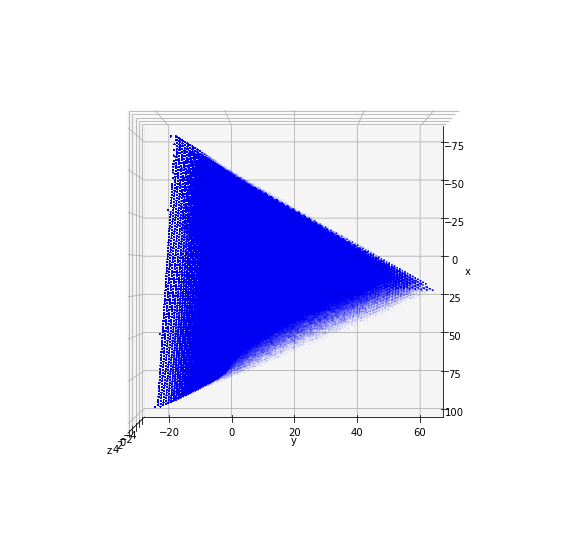

In [31]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_X_low[:,0], new_X_low[:,1], new_X_low[:,2], s=0.1, color='blue', alpha=0.1)
elev = 90
azim = 0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

### Drawing 3D & z height

In [ ]:
a = r"C:\Users\mokss\Dropbox\TorchGNN_project\data_temp\100_list_shell.p"
a = pickle.load(open(a, "rb"))
prop_list = a['prop_list']
name100 = a['name_list']

data_mean = np.mean(prop_list, axis=0)
data_scaled = prop_list-data_mean
pca = PCA(n_components=6) 
pca.fit(data_scaled)
X_low = pca.transform(data_scaled)

a = r"C:\Users\mokss\Dropbox\TorchGNN_project\data_temp\WS_flex_graph_100_bimodal.p"
a = pickle.load(open(a, "rb"))
prop_list = a['prop_list']
name100 = a['name_list']

data_mean = np.mean(prop_list, axis=0)
data_scaled = prop_list-data_mean
pca = PCA(n_components=6) 
pca.fit(data_scaled)
X_low = pca.transform(data_scaled)

a = r"C:\Users\mokss\Dropbox\TorchGNN_project\data_temp\WL_flex_graphs_100_shell_UNION.p"
a = pickle.load(open(a, "rb"))

prop_list = np.array(a['prop_list'])
data_mean = np.mean(prop_list, axis=0)
data_scaled = prop_list-data_mean
pca = PCA(n_components=6) 
pca.fit(data_scaled)
X_low = pca.transform(data_scaled)

a = r"C:\Users\mokss\Dropbox\TorchGNN_project\data_temp\WL_flex_graphs_100_shell_UNION_pca_sub_80.p"
a = pickle.load(open(a, "rb"))

prop_list = np.array(a['prop_list'])
X_low = np.array(a['X_low'])

a = r"C:\Users\mokss\Dropbox\TorchGNN_project\data_temp\16_list_shell_noJ.p"
a = pickle.load(open(a, "rb"))
prop_list = np.array(a['prop_list'])
name100 = a['name_list']

data_mean = np.mean(prop_list, axis=0)
data_scaled = prop_list-data_mean
pca = PCA(n_components=6) 
pca.fit(data_scaled)
X_low = pca.transform(data_scaled)

In [ ]:
fig = plt.figure(figsize = (60,10))
cmap = plt.cm.bwr

white = plt.cm.seismic(np.ones(20)*0.3)
upper = plt.cm.seismic(np.ones(10))
white = plt.cm.seismic(np.ones(20)*0.3)

colors = np.vstack((white, upper, white))
tmap = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map_white', colors)
    
size = 0.1

zmin = np.min(X_low[:,2])
zmax = np.max(X_low[:,2])
tik = zmax - zmin
 
ax = fig.add_subplot(161, projection='3d')
ax.scatter(X_low[:,0], -X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=zmin, vmax= zmin + 0.2*tik)
elev = 90
azim = 180
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(162, projection='3d')
ax.scatter(X_low[:,0], -X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=zmin+ 0.2*tik, vmax= zmin + 0.4*tik)
elev = 90
azim = 180
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(163, projection='3d')
ax.scatter(X_low[:,0], -X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=zmin+ 0.4*tik, vmax= zmin + 0.6*tik)
elev = 90
azim = 180
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(164, projection='3d')
ax.scatter(X_low[:,0], -X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=zmin+ 0.6*tik, vmax= zmin + 0.8*tik)
elev = 90
azim = 180
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

ax = fig.add_subplot(165, projection='3d')
ax.scatter(X_low[:,0], -X_low[:,1], X_low[:,2], s=size, cmap=tmap, c=X_low[:,2], vmin=zmin+ 0.8*tik, vmax= zmin + tik)
elev = 90
azim = 180
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev, azim)

#save_fig(fig, r"C:\Users\mokss\Dropbox\Elements\100_UNION_3d_z_grad2.png")

### Deviding test result by node

In [ ]:
k=0
f = plt.figure(figsize=(45,120))
for path, topo in zip([
"/home/ubuntu/TorchGNN_project/GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-34_train_100_group_2_64_10_att___/TorchGNN_001_Torchloader_100_2021-Jul-19-02-44-31_wheel_0.3_3_64_10_att______",
"/home/ubuntu/TorchGNN_project/GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-34_train_100_group_2_64_10_att___/TorchGNN_001_Torchloader_100_2021-Jul-19-02-45-34_lollipop_0.3_3_64_10_att______",
"/home/ubuntu/TorchGNN_project/GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-34_train_100_group_2_64_10_att___/TorchGNN_001_Torchloader_100_2021-Jul-19-02-45-14_star_0.3_3_64_10_att______"
    

    
], ['wheel', 'lollipop', 'star', 'wheel', 'lollipop', 'star', 'wheel', 'lollipop', 'star', 'wheel', 'lollipop', 'star']):
    
    path = path[30:]
    name = pickle.load(open(os.path.join(path, 'name.p'), "rb"))
    try:
        q = pd.read_csv(os.path.join(path, "gt_pts_{}_0.3.csv".format(topo)), sep='\t', header=None).values
        p = pd.read_csv(os.path.join(path, "pred_pts_{}_0.3.csv".format(topo)), sep='\t', header=None).values
    except:
        q = pd.read_csv(os.path.join(path, "gt_pts_{}_0.3_3.csv".format(topo)), sep='\t', header=None).values
        p = pd.read_csv(os.path.join(path, "pred_pts_{}_0.3_3.csv".format(topo)), sep='\t', header=None).values
            
    
    for idx, i in enumerate(name[:10]):
        plt.subplot(24,10,idx+1 + k*20)
        test_graph = i.split('/')[-1]
        try:
            test_graph = pickle.load(open(os.path.join("data_temp/exp1_test/test_0.3/new_16/{}_0.3".format(topo), test_graph), "rb"))
            num_node = 16
        except:
            try:
                test_graph = pickle.load(open(os.path.join("data_temp/exp1_test/test_0.3/36/{}_0.3".format(topo), test_graph), "rb"))
                num_node = 36
            except:
                try:
                    test_graph = pickle.load(open(os.path.join("data_temp/exp1_test/test_0.3/64/{}_0.3".format(topo), test_graph), "rb"))
                    num_node = 64
                except:
                    test_graph = pickle.load(open(os.path.join("data_temp/exp1_test/test_0.3/100/{}_0.3_3".format(topo), test_graph), "rb"))
                    num_node = 100

        J = test_graph['J'].todense()
        for ii,jj in product([k for k in range(num_node)], [k for k in range(num_node)]):
            if J[ii,jj] != 0:
                J[ii,jj] = 1
        G = nx.from_numpy_array(J)
        nx.draw_networkx(G)

        P = torch.tensor(p[num_node*idx:num_node*(idx+1), :])
        Q = torch.tensor(q[num_node*idx:num_node*(idx+1), :])

        loss_func = nn.KLDivLoss(reduction = 'none')
        loss = loss_func(np.log(Q), P)
        loss = torch.sum(loss, axis=1)
#         loss = np.log10(loss)

        plt.subplot(24,10,idx+1+10 + k*20)
        plt.plot([i for i in range(num_node)], loss)
    print(num_node, topo)
    k+=1
save_fig(f, r"C:\Users\mokss\Dropbox\Elements\modality\train_100_att.pdf")
#         plt.subplot(3,10,idx+1+20)
#         plt.plot([i for i in range(16)], loss2)



### Location of Lollipop, wheel, star in PCA

In [ ]:
d = "/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/WL_flex_graphs_100_shell_UNION.p"
d = pickle.load(open(d, "rb"))
data = np.array(d['prop_list'])
print("data1")


d = "/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/16_list_shell_noJ.p"
d = pickle.load(open(d, "rb"))
data = np.concatenate([data, np.array(d['prop_list'])], axis=0)
plt.figure(figsize=(30,10))
print("data2")

for ii,topo in tqdm(enumerate(['lollipop', 'wheel', 'star'])):
    topology = NetworkTopology(num_nodes=16, seed=0)#
    G, W = topology.generate(topology=topo)
    _, deg, _ = degree(G)
    new_p = np.array([[np.mean(deg), np.std(deg), np.max(deg), np.min(deg),
               nx.average_clustering(G), nx.average_shortest_path_length(G)]])
    print(deg,new_p)
    
    plt.subplot(2,3,ii+1)
    a = Counter(deg)
    sum_count = sum(a.values())
    plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=False, edgecolor='blue', width=0.4,label='Train')
    plt.xlim(0,100)
    
    data = np.concatenate([data, new_p], axis=0)
    
for ii,topo in tqdm(enumerate(['lollipop', 'wheel', 'star'])):
    topology = NetworkTopology(num_nodes=100, seed=0)#
    G, W = topology.generate(topology=topo)
    _, deg, _ = degree(G)
    new_p = np.array([[np.mean(deg), np.std(deg), np.max(deg), np.min(deg),
               nx.average_clustering(G), nx.average_shortest_path_length(G)]])
    print(deg,new_p)
    
    plt.subplot(2,3,ii+1+3)
    a = Counter(deg)
    sum_count = sum(a.values())
    plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=False, edgecolor='blue', width=0.4,label='Train')
    plt.xlim(0,100)
    
    data = np.concatenate([data, new_p], axis=0)
    
data_mean = np.mean(data, axis=0)
data_scaled = data-data_mean
pca = PCA(n_components=6) 
pca.fit(data_scaled)

X_low = pca.transform(data_scaled)

### Drawing Principal component 1, 2

In [ ]:
f = plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
cmap = plt.cm.bwr
d = "/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/WL_flex_graphs_100_shell_UNION.p"
d = pickle.load(open(d, "rb"))


data = d['prop_list']
print(np.array(data).shape)
data_mean = np.mean(data, axis=0)
data_scaled = (data-data_mean)
pca = PCA(n_components=6)
pca.fit(data_scaled)
X_low = pca.transform(data_scaled)

plt.scatter(X_low[:,0], -X_low[:,1], s=0.1)
plt.xlabel("Principal component1")
plt.ylabel("Principal component2")

d = "/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/WL_flex_graphs_100_shell_UNION_pca_sub_80.p"
d = pickle.load(open(d, "rb"))

plt.subplot(1,2,2)
X_low = np.array(d['X_low'])

plt.scatter(X_low[:,0], -X_low[:,1], s=0.1)
plt.xlabel("Principal component1")
plt.ylabel("Principal component2")

### Drawing Explained variance ratio

In [ ]:
fig = plt.figure(dpi=150)
cmap = plt.cm.bwr
# d = "/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/100_list_shell.p"
d = "/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/WL_flex_graphs_100_shell_UNION.p"
d = pickle.load(open(d, "rb"))
data = d['prop_list']

data_mean = np.mean(data, axis=0)
data_scaled = data-data_mean
pca = PCA(n_components=6) 
pca.fit(data_scaled)
X_low = pca.transform(data_scaled)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.plot(cum_sum_eigenvalues, label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# fig.savefig("Elements/V16_pca_explain.pdf", bbox_inches='tight')

### Drawing degree distribution by MIN, MAX

In [ ]:
f = plt.figure(figsize=(60,22))
x = sorted(x, key=lambda i: i[1])
deg_list = []
aa = np.linspace(np.min(np.array(x)[:,1]),np.max(np.array(x)[:,1]),6)
for k in tqdm(range(5), leave=False):
    m = aa[k]
    M = aa[k+1]
    kk=0
    plt.subplot(2,5,k+1)        
    plt.scatter(-X_low[:,0],-X_low[:,1],s=0.5, cmap=cmap, c=data[:,0])

    print(-M , -m)
    for i in tqdm(x, leave=False):
        if -M<=-i[1]<=-m:
            plt.scatter(-X_low[i[2], 0], -X_low[i[2], 1], s=0.5, color='black')
            name = name_list[i[2]]
            for ii in os.listdir("data_temp/WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal"):
                if name in ii:
                    G = os.path.join("data_temp/WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal", ii)
                    G = pickle.load(open(G, "rb"))
                    J = G['J'].todense()
                    G = nx.from_numpy_array(J)
                    _, deg, _ = degree(G)
                    deg_list+=deg
                    kk+=1
            
    print(kk)
    a = Counter(deg_list)
    sum_count = sum(a.values())
    plt.subplot(2,5,k+1+5)
    plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=True, edgecolor='blue', width=0.4,label='Test')
    plt.xlim(0,100)
    plt.ylabel("Distribution")
    plt.xlabel("Degree")

### Drawing degree distribution in PCA by grid

In [ ]:
data = pickle.load(open("data_temp/WS_TEST_pca_sub_80.p", "rb"))['prop_list']
name_list = pickle.load(open("data_temp/WS_TEST_pca_sub_80.p", "rb"))['name_list']
print("data_loaded")
data = np.array(data)

X_low = np.array(pickle.load(open("data_temp/WS_TEST_pca_sub_80.p", "rb"))['X_low'])

f= plt.figure(figsize=(40,20))
x_space = np.linspace(np.min(-X_low[:,0]), np.max(-X_low[:,0]), 5)
y_space = np.linspace(np.min(-X_low[:,1]), np.max(-X_low[:,1]), 5)
k=0
idx = [16,8,0,25,17,9,1,26,18,10,2,19,11,3]
for i,j in tqdm(product(range(4), range(4))):
    graph_list = []
    name_list2 = []
    deg_list = []
    x_min = x_space[i]
    x_max = x_space[i+1]
    y_min = y_space[j]
    y_max = y_space[j+1]
    
    center_x, center_y = (x_min+x_max)*0.5, (y_min+y_max)*0.5
    radius = 0.5*(x_max - x_min + y_max - y_min)
    for x, ii in enumerate(X_low):
        if x_min<=-ii[0]<=x_max and y_min<=-ii[1]<=y_max:
#         if (center_x + ii[0])**2/10 + (center_y + ii[1])**2/10 < radius:
            graph_list.append(ii)
            name_list2.append(name_list[x])
        
    if len(name_list2) !=0:
        for _ in name_list2:
            for __ in os.listdir("data_temp/WS_TEST_pca_sub_80"):
                if _ in __:
                    graph_path = os.path.join("data_temp/WS_TEST_pca_sub_80", __)
                    try:
                        graph = pickle.load(open(graph_path, "rb"))
                        J = graph['J'].todense()
                        G = nx.from_numpy_array(J)
                        deg, b, c = degree(G)
                        deg_list+=deg
                    except:
                        print(graph_path)
                    
                    
        a = Counter(deg_list)
        sum_count = sum(a.values())
        plt.subplot(4,8,idx[k]+1)
        plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=True, edgecolor='blue', width=0.4,label='Test')
        plt.xlim(0,100)
        
        plt.subplot(4,8,idx[k]+4+1)
        graph_list = np.array(graph_list)
        plt.scatter(-X_low[:,0], -X_low[:,1], s=1)
        plt.scatter(-graph_list[:,0], -graph_list[:,1], color='black', s=1)
        k+=1

### Drawing property gradation by ticks

In [ ]:
ff = plt.figure(figsize=(400,360))
for iii in range(6):
    cmap = plt.cm.bwr
    a = pickle.load(open("data_temp/WL_flex_graphs_100_shell_UNION.p", "rb"))
    data = np.array(a['prop_list'])
    aa = a['name_list']

    data_mean = np.mean(data, axis=0)
    data_scaled = (data-data_mean)
    pca = PCA(n_components=6) 
    pca.fit(data_scaled)
    X_low = pca.transform(data_scaled)
    x = X_low

    denominator, xedges, yedges = np.histogram2d(x[:,0],x[:,1],bins=30)
    color = data[:,iii]
    nominator, _, _ = np.histogram2d(x[:,0],x[:,1],bins=[xedges, yedges], weights=color)
    result = nominator / denominator
    result = result.T
    asdf = []
    for i in result:
        for j in i:
            if not np.isnan(j):
                asdf.append(j)

    min_value = min(asdf)
    max_value = max(asdf)
    tick = (max_value - min_value)/15

    for i in tqdm(range(15)):
        plt.subplot(12,15,16 - (i+1) + iii*30)

        X, Y = np.meshgrid(xedges, yedges)
        plt.pcolormesh(X, -Y,result, cmap=cmap, vmin=min_value, vmax=max_value - tick*(i))
        ax = plt.gca()
        ax.set_facecolor('black')
        plt.xlim(-90,100)
        plt.ylim(-80,30)


    for i in tqdm(range(15)):
        plt.subplot(12,15,i+1+15 + iii*30)

        X, Y = np.meshgrid(xedges, yedges)
        plt.pcolormesh(X, -Y,result, cmap=cmap, vmin=min_value+tick*(i) , vmax=max_value)
        ax = plt.gca()
        ax.set_facecolor('black')
        plt.xlim(-90,100)
        plt.ylim(-80,30)

# GNN_exp directory

In [12]:
add_v16 = [
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-40_train_16_(3,2,1)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-43_train_16_(4,3,2)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-46_train_16_(5,4,3)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-49_train_16_(6,5,4)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-52_train_16_(7,6,5)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-24_train_16_(8,7,6)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-27_train_16_(9,8,7)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-30_train_16_(10,9,8)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-33_train_16_(11,10,9)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-37_train_16_(12,11,10)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-12-55-46_train_16_(13,12,11)_64_10_add', 
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-12-55-50_train_16_(14,13,12)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-12-55-53_train_16_(15,14,13)_64_10_add'
]
att_v16 = [
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-38_train_16_(3,2,1)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-41_train_16_(4,3,2)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-44_train_16_(5,4,3)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-47_train_16_(6,5,4)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-50_train_16_(7,6,5)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-22_train_16_(8,7,6)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-25_train_16_(9,8,7)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-29_train_16_(10,9,8)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-32_train_16_(11,10,9)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-35_train_16_(12,11,10)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-10-31-34_train_16_(13,12,11)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-10-31-37_train_16_(14,13,12)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-10-31-40_train_16_(15,14,13)_64_10_att___'
]
add_v16_sk = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-08-09-32-06_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-02-28-53_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-08-09-32-09_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-02-28-56_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-08-09-32-13_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-02-28-59_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-02-29-02_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-08-09-32-17_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-02-29-05_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-02-29-08_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-08-09-32-19_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-02-29-11_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-08-09-32-22_train_64_10_add__SK_"
]

add_v16_ip = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-08-15-03-36_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-02-29-14_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-08-15-03-38_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-02-29-17_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-08-15-03-41_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-02-29-20_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-02-29-23_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-08-15-03-43_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-02-29-26_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-02-29-29_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-08-15-03-47_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-02-29-32_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-08-15-03-50_train_64_10_add__SK_IP",
]
att_v16_sk = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-09-08-52-09_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-10-10-14_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-09-08-52-12_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-10-10-17_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-09-08-52-15_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-10-10-20_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-10-10-23_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-09-08-52-18_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-10-10-26_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-10-10-29_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-09-08-52-21_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-10-10-32_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-09-08-52-24_train_64_10_att__SK_",
]

att_v16_ip = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-09-02-23-09_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-10-10-35_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-09-02-23-12_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-10-10-38_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-09-02-23-15_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-10-10-41_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-10-10-44_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-09-02-23-18_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-10-10-47_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-10-10-50_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-09-02-23-21_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-10-10-53_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-09-02-23-24_train_64_10_att__SK_IP"
]

#################################################################################################

add_v16_03 = [
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-10-08-14-55_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-16-13-17-58_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-10-05-18-39_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-16-13-18-01_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-10-05-18-41_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-16-13-18-04_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-16-13-18-07_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-10-05-18-44_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-16-13-18-10_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-16-13-18-13_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-10-05-18-48_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-16-13-18-16_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-10-05-18-51_train_64_10_add___"
]
att_v16_03 = [
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-17-10-42-30_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-17-10-42-33_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-17-10-42-36_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-17-10-42-39_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-17-10-42-42_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-17-10-42-45_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-17-10-42-48_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-17-10-42-51_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-17-10-42-54_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-17-10-42-57_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-17-10-43-00_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-17-10-43-03_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-17-10-43-06_train_64_10_att___" 
]
add_v16_03_sk = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-22-14-26-45_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-22-14-26-48_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-22-14-26-52_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-22-14-26-55_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-22-14-26-58_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-22-14-27-01_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-22-14-27-04_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-22-14-27-07_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-22-14-27-10_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-22-14-27-13_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-22-14-27-16_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-22-14-27-19_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-22-14-27-22_train_64_10_add__SK_'
]
add_v16_03_ip = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-23-14-12-49_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-23-14-12-52_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-23-14-12-55_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-23-14-12-58_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-23-14-13-01_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-23-14-13-04_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-23-14-13-07_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-23-14-13-10_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-23-14-13-13_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-23-14-13-16_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-23-14-13-19_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-23-14-13-22_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-23-14-13-26_train_64_10_add__SK_IP_'
]
att_v16_03_sk = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-24-10-50-19_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-24-10-50-22_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-24-10-50-25_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-24-10-50-28_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-24-10-50-31_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-24-10-50-34_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-24-10-50-37_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-24-17-14-11_train_64_10_att__SK__',
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-24-17-14-08_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-24-17-14-05_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-24-17-14-03_train_64_10_att__SK__',
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-24-10-50-53_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-24-10-50-56_train_64_10_att__SK__'
]
att_v16_03_ip = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-23-18-50-41_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-23-18-50-44_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-23-18-50-47_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-23-18-50-50_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-23-18-50-53_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-23-18-50-56_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-23-18-50-59_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-23-18-51-02_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-23-18-51-05_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-23-18-51-08_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-23-18-51-11_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-23-18-51-15_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-23-18-51-18_train_64_10_att__SK_IP_'  
]

#################################################################################################

add_v16_06 = [
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-18-04-38-41_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-18-04-38-43_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-18-04-38-46_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-18-04-38-50_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-18-04-38-53_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-18-04-38-56_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-18-04-41-21_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-29-14-22-40_train_64_10_add____",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-18-04-41-28_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-18-04-41-31_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-18-04-41-35_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-18-04-41-37_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-18-04-41-41_train_64_10_add___"
]
att_v16_06 = [
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-18-13-44-43_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-18-13-44-46_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-18-13-44-49_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-18-13-44-52_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-18-13-44-55_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-27-04-25-12_train_64_10_att____",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-18-13-45-01_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-18-13-45-04_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-18-13-45-07_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-18-13-45-10_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-18-13-45-13_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-18-13-45-17_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-18-13-45-20_train_64_10_att___",
]
add_v16_06_sk = [
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-24-17-48-30_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-24-17-48-33_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-24-17-48-37_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-24-17-48-40_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-24-17-48-43_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-24-17-48-46_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-24-17-48-50_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-24-17-48-53_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-24-17-48-57_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-24-17-49-00_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-24-17-49-03_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-24-17-49-06_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-24-17-49-09_train_64_10_add__SK__'
]
add_v16_06_ip = [
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-25-03-14-50_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-25-03-14-53_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-25-03-14-56_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-25-03-14-59_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-25-03-15-02_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-25-03-15-05_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-25-03-15-08_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-25-03-15-11_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-25-03-15-14_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-25-03-15-17_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-25-03-15-20_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-25-03-15-23_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-25-03-15-27_train_64_10_add__SK_IP_'  
]
att_v16_06_sk = [
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-25-18-48-16_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-25-18-48-19_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-25-18-48-22_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-25-18-48-25_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-25-18-48-28_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-25-18-48-31_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-25-18-48-34_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-25-18-48-37_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-25-18-48-40_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-25-18-48-43_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-25-18-48-46_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-25-18-48-49_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-25-18-48-52_train_64_10_att__SK__"
]
att_v16_06_ip = [
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-25-08-37-10_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-25-08-37-13_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-25-08-37-16_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-25-08-37-19_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-25-08-37-22_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-25-08-37-25_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-25-08-37-28_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-25-08-37-31_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-25-08-37-34_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-25-08-37-37_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-25-08-37-40_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-25-08-37-43_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-25-08-37-46_train_64_10_att__SK_IP_'  
]

add_v100 = [
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-53_train_100_group_4_64_10_add",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-49_train_100_group_3_64_10_add",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_2.5_2021-Jun-14-14-57-04_train_64_10_add______",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-47_train_100_group_2_64_10_add",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_1.5_2021-Jun-14-14-53-32_train_64_10_add______",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-43_train_100_group_1_64_10_add",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-40_train_100_group_0_64_10_add"
]

add_v100_sk = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-42_train_100_group_4_64_10_add__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-18_train_100_group_3_64_10_add__SK_",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_2.5_2021-Jun-14-14-57-08_train_64_10_add__SK____",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-06_train_100_group_2_64_10_add__SK_",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_1.5_2021-Jun-14-14-53-35_train_64_10_add__SK____",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-07-54_train_100_group_1_64_10_add__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-30_train_100_group_0_64_10_add__SK_"
]

add_v100_ip = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-45_train_100_group_4_64_10_add__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-21_train_100_group_3_64_10_add__SK_IP",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_2.5_2021-Jun-14-14-57-11_train_64_10_add__SK_IP___",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-09_train_100_group_2_64_10_add__SK_IP",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_1.5_2021-Jun-14-14-53-38_train_64_10_add__SK_IP___",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-07-57_train_100_group_1_64_10_add__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-33_train_100_group_0_64_10_add__SK_IP"
]

att_v100 = [
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-28_train_100_group_4_64_10_att___",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-31_train_100_group_3_64_10_att___",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_2.5_2021-Jun-14-14-57-13_train_64_10_att______",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-34_train_100_group_2_64_10_att___",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_1.5_2021-Jun-14-14-53-41_train_64_10_att______",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-37_train_100_group_1_64_10_att___",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-18-18-56-21_train_100_group_0_64_10_att___"
]

att_v100_sk = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-48_train_100_group_4_64_10_att__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-24_train_100_group_3_64_10_att__SK_",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_2.5_2021-Jun-14-14-57-16_train_64_10_att__SK____",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-12_train_100_group_2_64_10_att__SK_",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_1.5_2021-Jun-14-14-53-44_train_64_10_att__SK____",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-00_train_100_group_1_64_10_att__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-36_train_100_group_0_64_10_att__SK_"
]

att_v100_ip = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-51_train_100_group_4_64_10_att__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-27_train_100_group_3_64_10_att__SK_IP",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_2.5_2021-Jun-14-14-57-20_train_64_10_att__SK_IP___",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-15_train_100_group_2_64_10_att__SK_IP",
#     "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_1.5_2021-Jun-14-14-53-47_train_64_10_att__SK_IP___",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-03_train_100_group_1_64_10_att__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-39_train_100_group_0_64_10_att__SK_IP",
]

add_v100_drop = [
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-17-18-55-22_train_64_10_add_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-17-18-55-08_train_64_10_add_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-16-17-30-32_train_64_10_add_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-15-13-54-05_train_64_10_add_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-15-13-50-49_train_64_10_add_______DROPOUT_2",
]

add_v100_drop_sk = [
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-17-18-55-26_train_64_10_add__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-17-18-55-08_train_64_10_add__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-16-17-30-35_train_64_10_add__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-15-13-54-09_train_64_10_add__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-15-13-50-52_train_64_10_add__SK_____DROPOUT_2",
]

add_v100_drop_ip = [
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-17-18-55-29_train_64_10_add__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-17-18-55-10_train_64_10_add__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-16-17-30-39_train_64_10_add__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-15-13-54-12_train_64_10_add__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-15-13-50-55_train_64_10_add__SK_IP____DROPOUT_2",
]

att_v100_drop = [
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-17-18-55-32_train_64_10_att_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-17-18-55-13_train_64_10_att_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-16-17-30-42_train_64_10_att_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-15-13-54-15_train_64_10_att_______DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-15-13-50-58_train_64_10_att_______DROPOUT_2",
]

att_v100_drop_sk = [
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-17-18-55-35_train_64_10_att__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-17-18-55-16_train_64_10_att__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-16-17-30-45_train_64_10_att__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-15-13-54-18_train_64_10_att__SK_____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-15-13-51-01_train_64_10_att__SK_____DROPOUT_2",
]

att_v100_drop_ip = [
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-22-23-50-40_train_64_10_att__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-22-23-50-37_train_64_10_att__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-16-17-30-48_train_64_10_att__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-15-13-54-21_train_64_10_att__SK_IP____DROPOUT_2",
"GNN_exp/V=100/DROPOUT2/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-15-13-51-04_train_64_10_att__SK_IP____DROPOUT_2",
]

add_v100_batch = [
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-10-15-23-30_train_64_10_add_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-11-15-06-34_train_64_10_add_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-12-03-06-51_train_64_10_add_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-12-16-29-48_train_64_10_add_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-12-16-35-57_train_64_10_add_______BATCHNORM"
]

add_v100_batch_sk = [
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-10-15-23-33_train_64_10_add__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-11-15-06-37_train_64_10_add__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-12-03-06-54_train_64_10_add__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-12-16-29-51_train_64_10_add__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-12-16-36-00_train_64_10_add__SK_____BATCHNORM"
]

add_v100_batch_ip = [
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-10-15-23-36_train_64_10_add__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-11-15-06-40_train_64_10_add__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-12-03-06-57_train_64_10_add__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-12-16-29-54_train_64_10_add__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-12-16-36-03_train_64_10_add__SK_IP____BATCHNORM"
]

att_v100_batch = [
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-10-15-23-39_train_64_10_att_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-11-15-06-43_train_64_10_att_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-12-03-07-00_train_64_10_att_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-12-16-29-57_train_64_10_att_______BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-12-16-36-06_train_64_10_att_______BATCHNORM"
]

att_v100_batch_sk = [
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-10-15-23-42_train_64_10_att__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-11-15-06-46_train_64_10_att__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-12-03-07-03_train_64_10_att__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-12-16-30-01_train_64_10_att__SK_____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-12-16-36-08_train_64_10_att__SK_____BATCHNORM"
]

att_v100_batch_ip = [
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_4_2021-Jun-10-15-23-45_train_64_10_att__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_3_2021-Jun-11-15-06-49_train_64_10_att__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_2_2021-Jun-12-03-07-07_train_64_10_att__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_1_2021-Jun-12-16-30-04_train_64_10_att__SK_IP____BATCHNORM",
"GNN_exp/V=100/BATCHNORM/TorchGNN_001_TorchGeoLoader_group_0_2021-Jun-12-16-36-12_train_64_10_att__SK_IP____BATCHNORM"
]




# test_path define

In [ ]:
test_path = []
c1,c2,c3,c4,c5,c6 = 0,0,0,0,0,0
for a,b,c,d,e,f in zip(add_v16,add_v16_sk,add_v16_ip,att_v16,att_v16_sk,att_v16_ip):
    for _ in os.listdir(a):
        if "exp2_test_16_0.75" in _:# and "0.3" not in _:
            path = os.path.join(a,_)
            c1+=1
            break
    test_path.append(path)
    path=0
    
    for _ in os.listdir(b):
        if "exp2_test_16_0.75" in _:# and "0.3" not in _:
            path = os.path.join(b,_)
            c2+=1
            break
    test_path.append(path)
    path=0
    
    for _ in os.listdir(c):
        if "exp2_test_16_0.75" in _:# and "0.3" not in _:
            path = os.path.join(c,_)
            c3+=1
            break
    test_path.append(path)
    path=0
    
    for _ in os.listdir(d):
        if "exp2_test_16_0.75" in _:# and "0.3" not in _:
            path = os.path.join(d,_)
            c4+=1
            break
    test_path.append(path)
    path=0

    for _ in os.listdir(e):
        if "exp2_test_16_0.75" in _:# and "0.3" not in _:
            path = os.path.join(e,_)
            c5+=1
            break
    test_path.append(path)
    path=0
    
    for _ in os.listdir(f):
        if "exp2_test_16_0.75" in _:# and "0.3" not in _:
            path = os.path.join(f,_)
            c6+=1
            break
    test_path.append(path)
    path=0
    
#     for _ in os.listdir(a):
#         test_path.append("GNN_exp/BP/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-10-05-18-44_train_64_10_add___/BeliefPropagation_001_TorchGeoLoader_data_temp_2021-Jun-01-15-25-36_exp2_test_16_0.75_64_10_add_______PATTERN")
#         break
#     "GNN_exp/BP/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-10-05-18-44_train_64_10_add___/BeliefPropagation_001_TorchGeoLoader_data_temp_2021-Jun-01-15-25-34_exp2_test_16_0.3_64_10_add_______PATTERN",
    
# "GNN_exp/BP/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-10-05-18-44_train_64_10_add___/BeliefPropagation_001_TorchGeoLoader_data_temp_2021-Jun-01-15-25-35_exp2_test_16_0.6_64_10_add_______PATTERN",
    
# "GNN_exp/BP/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-10-05-18-44_train_64_10_add___/BeliefPropagation_001_TorchGeoLoader_data_temp_2021-Jun-01-15-25-36_exp2_test_16_0.75_64_10_add_______PATTERN",
print(c1,c2,c3,c4,c5,c6)

In [23]:
test_path = []
keyword = "WS_flex_graph_100_bimodal_pca_sub_80_SP_JB_2"
c1,c2,c3,c4,c5,c6 = 0,0,0,0,0,0
for a,b,c,d,e,f in zip(add_v100,add_v100_sk,add_v100_ip,att_v100,att_v100_sk,att_v100_ip):
# for a,b,c,d,e,f in zip(add_v100_batch,add_v100_batch_sk,add_v100_batch_ip,att_v100_batch,att_v100_batch_sk,att_v100_batch_ip):
# for a,b,c,d,e,f in zip(add_v100_drop,add_v100_drop_sk,add_v100_drop_ip,att_v100_drop,att_v100_drop_sk,att_v100_drop_ip):
    for _ in os.listdir(a):
        if keyword in _:
            path = os.path.join(a,_)
            c1+=1
            test_path.append(path)
            path=0
            break
    
    for _ in os.listdir(b):
        if keyword in _:
            path = os.path.join(b,_)
#             print(path)
            c2+=1
            test_path.append(path)
            path=0
            break
    
    for _ in os.listdir(c):
        if keyword in _:
            path = os.path.join(c,_)
#             print(path)
            c3+=1
            test_path.append(path)
            path=0
            break
    
    for _ in os.listdir(d):
        if keyword in _:
            path = os.path.join(d,_)
#             print(path)
            c4+=1
            test_path.append(path)
            path=0
            break
    
    for _ in os.listdir(e):
        if keyword in _:
            path = os.path.join(e,_)
            c5+=1
            test_path.append(path)
            path=0
            break
    
    for _ in os.listdir(f):
        if keyword in _:
            path = os.path.join(f,_)
            c6+=1
            test_path.append(path)
            path=0
            break
   
print(c1,c2,c3,c4,c5,c6)

5 5 5 5 5 5


In [24]:
len(test_path), test_path

(30,
 ['GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-53_train_100_group_4_64_10_add\\TorchGNN_001_Torchloader_data_temp_2021-Jul-30-16-28-30_WS_flex_graph_100_bimodal_pca_sub_80_SP_JB_2_64_10_add______',
  'GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-42_train_100_group_4_64_10_add__SK_\\TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-30-16-14-32_WS_flex_graph_100_bimodal_pca_sub_80_SP_JB_2_64_10_add__SK____',
  'GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-45_train_100_group_4_64_10_add__SK_IP\\TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-30-16-14-34_WS_flex_graph_100_bimodal_pca_sub_80_SP_JB_2_64_10_add__SK_IP___',
  'GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-28_train_100_group_4_64_10_att___\\TorchGNN_001_Torchloader_data_temp_2021-Jul-30-16-14-39_WS_flex_graph_100_bimodal_pca_sub_80_SP_JB_2_64_10_att______',
  'GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-48_train_100_group_4_64_10_att__SK_\\TorchGNN_001_Torch

In [ ]:
test_path = [
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_0_4_unimodal_2021-Jul-13-14-30-51_train_64_10_add______/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-14-14-38-55_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add______",
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_0_4_unimodal_2021-Jul-13-14-30-54_train_64_10_add__SK____/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-14-14-38-56_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add__SK____",
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_0_4_unimodal_2021-Jul-13-14-30-57_train_64_10_add__SK_IP___/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-14-14-38-57_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add__SK_IP___",
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_0_4_unimodal_2021-Jul-14-14-51-33_train_64_10_att______/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-15-10-19-29_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att______",
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_0_4_unimodal_2021-Jul-14-14-51-37_train_64_10_att__SK____/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-15-10-19-28_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att__SK____",
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_0_4_unimodal_2021-Jul-14-14-51-39_train_64_10_att__SK_IP___/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-15-10-19-30_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att__SK_IP___",
    
    
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_3_1_unimodal_2021-Jul-15-23-39-00_train_64_10_add______/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-16-14-31-46_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add______
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_3_1_unimodal_2021-Jul-15-23-39-03_train_64_10_add__SK_IP___/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-16-14-31-47_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add__SK_IP___
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_3_1_unimodal_2021-Jul-15-23-39-06_train_64_10_att__SK____/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-16-14-31-48_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att__SK____
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_3_1_unimodal_2021-Jul-15-23-39-09_train_64_10_add__SK____/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-16-14-31-50_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add__SK____
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_3_1_unimodal_2021-Jul-15-23-39-12_train_64_10_att______/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-16-14-31-50_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att______
# "GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_3_1_unimodal_2021-Jul-15-23-39-15_train_64_10_att__SK_IP___/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-16-14-31-52_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att__SK_IP___
    
    
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_two_unimodal_2021-Jul-18-04-13-46_train_64_10_add______/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-19-00-42-29_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add______",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_two_unimodal_2021-Jul-18-04-13-49_train_64_10_add__SK_IP___/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-19-00-42-30_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add__SK_IP___",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_two_unimodal_2021-Jul-18-04-13-52_train_64_10_att__SK____/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-19-00-42-32_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att__SK____",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_two_unimodal_2021-Jul-18-04-13-55_train_64_10_add__SK____/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-19-00-42-33_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_add__SK____",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_two_unimodal_2021-Jul-18-04-13-58_train_64_10_att______/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-19-00-42-34_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att______",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_group_two_unimodal_2021-Jul-18-04-14-01_train_64_10_att__SK_IP___/TorchGNN_001_TorchGeoLoader_data_temp_2021-Jul-19-00-42-35_WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal_64_10_att__SK_IP___"
]

# Drawing test result


[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[-0.25157915  0.59652775]
 [-0.25157915  0.59652775]
 [-0.25157915  0.59652775]
 [-0.25157915  0.59652775]
 [-0.25157915  0.59652775]]


(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)
(3256, 4)




[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]] [[-0.25157915  0.59652775]
 [-0.25157915  0.59652775]
 [-0.25157915  0.59652775]
 [-0.25157915  0.59652775]
 [-0.25157915  0.59652775]]


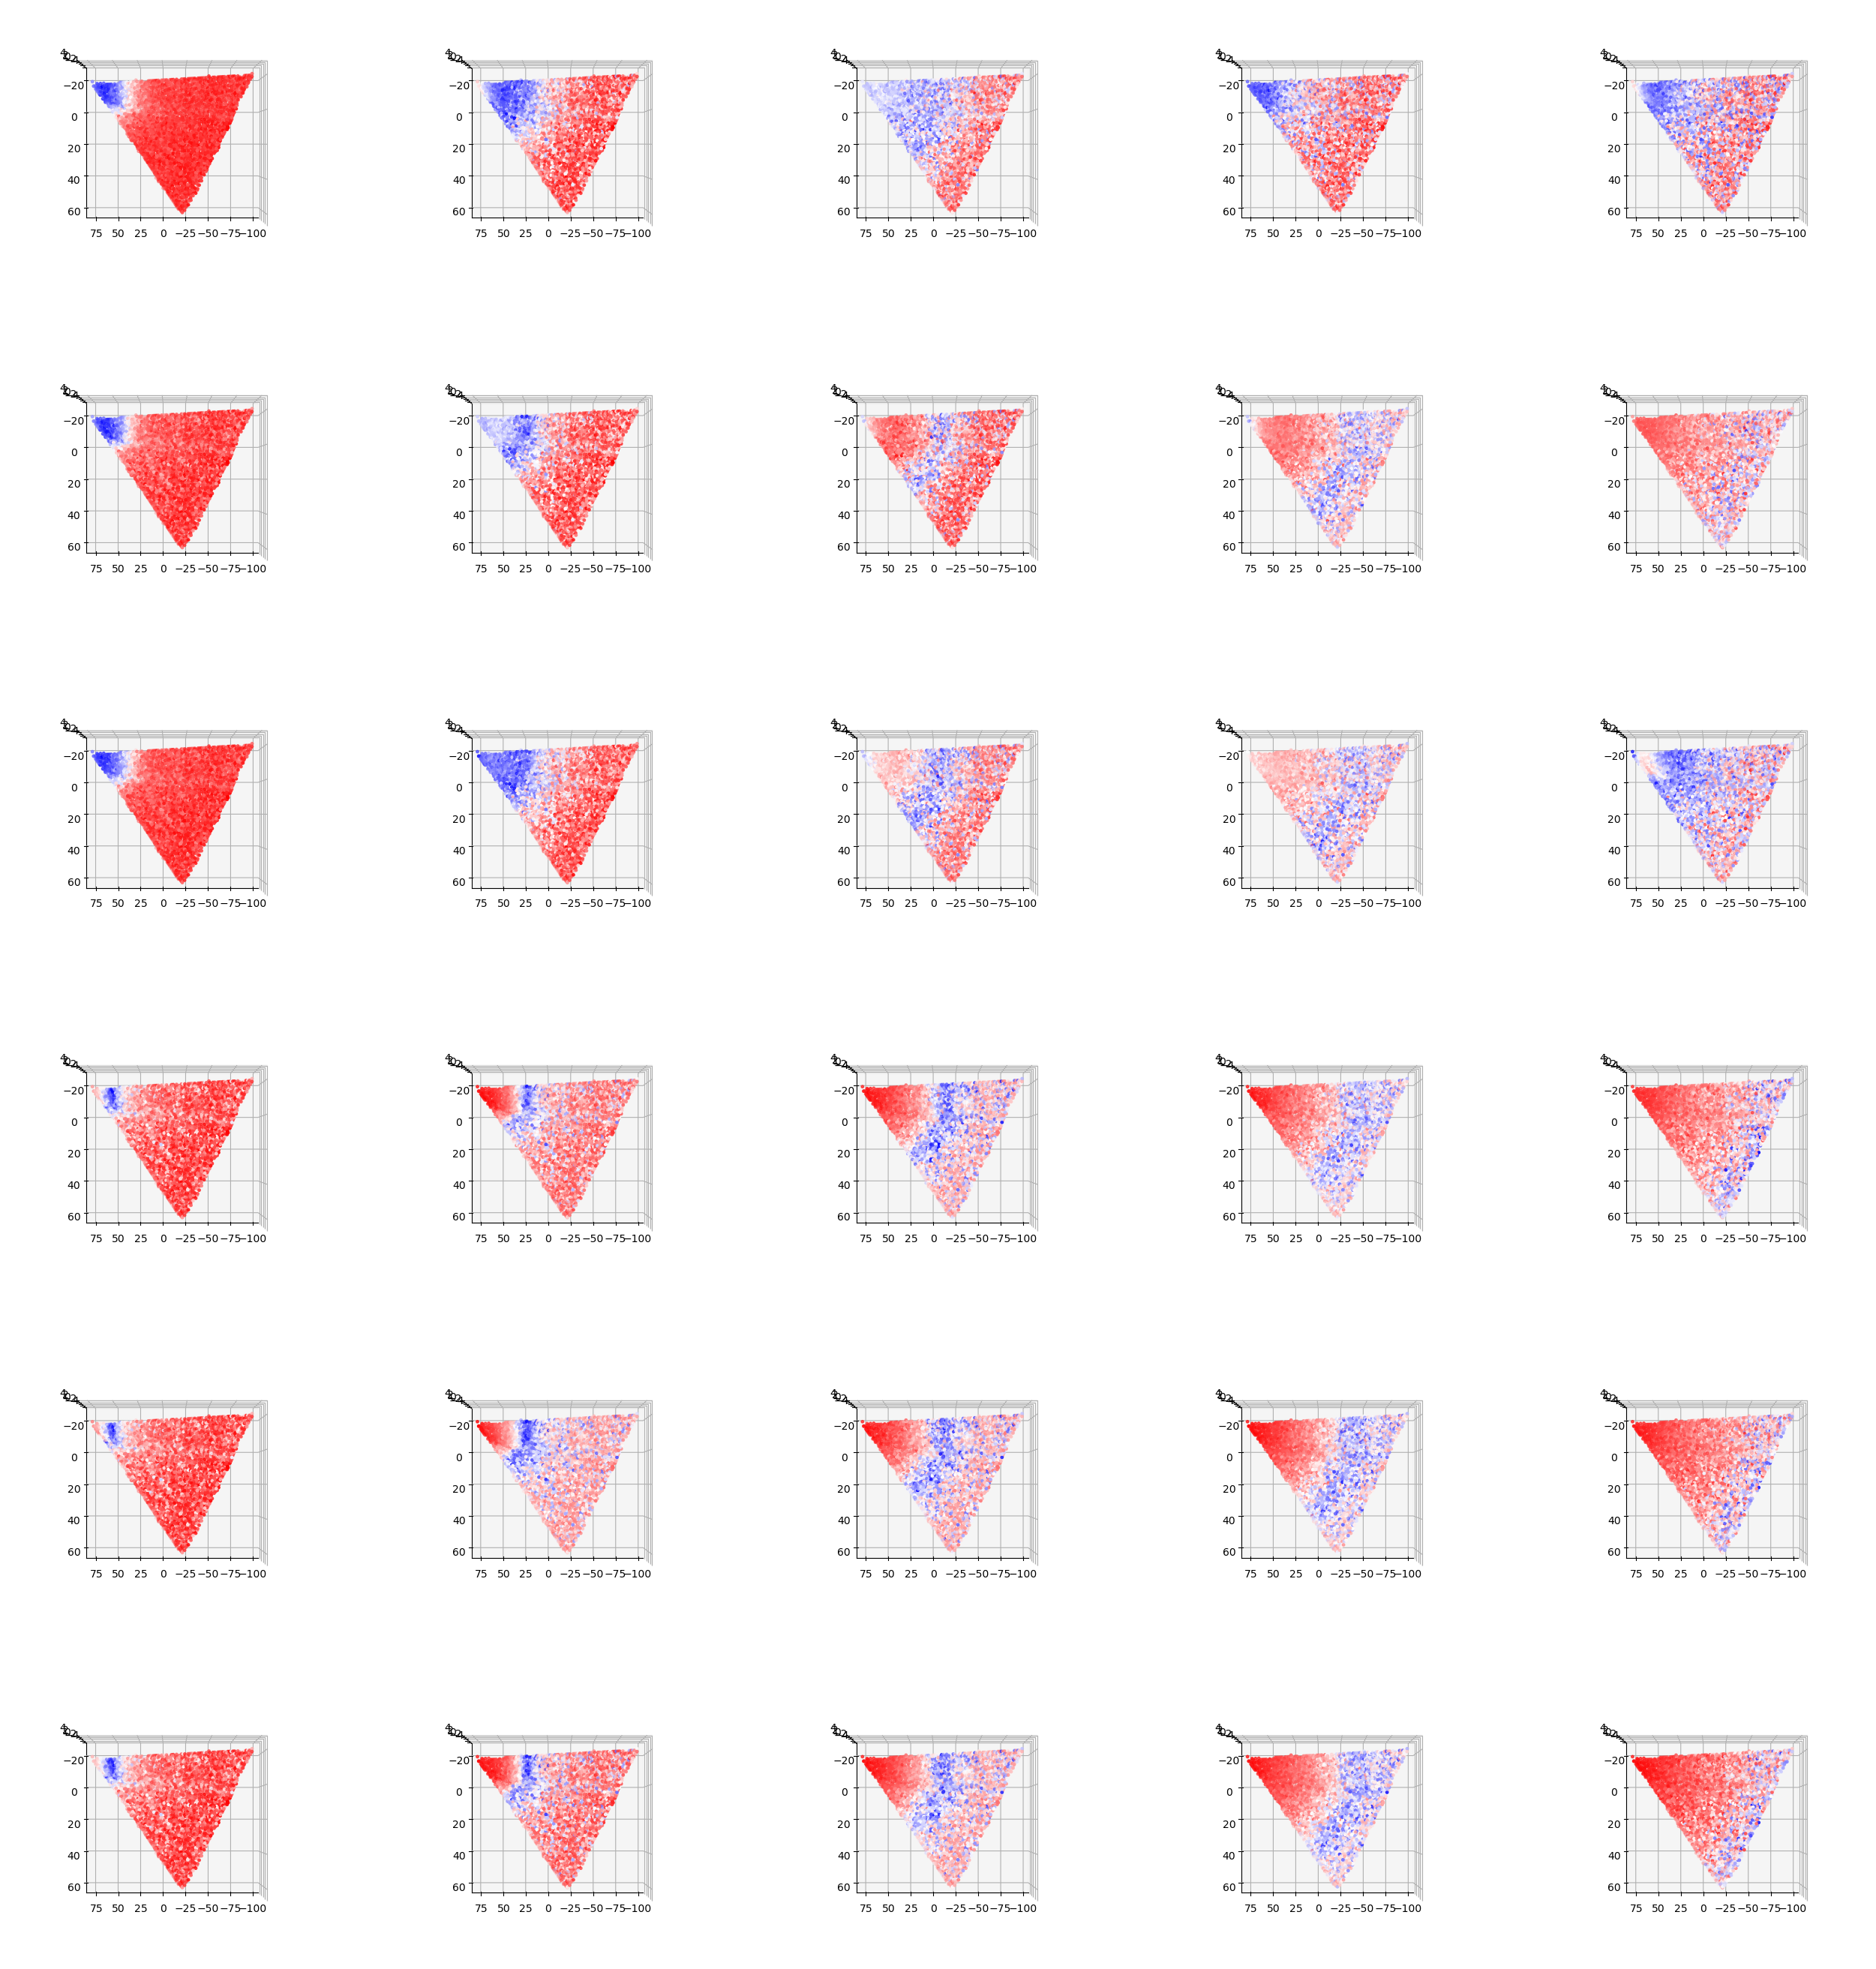

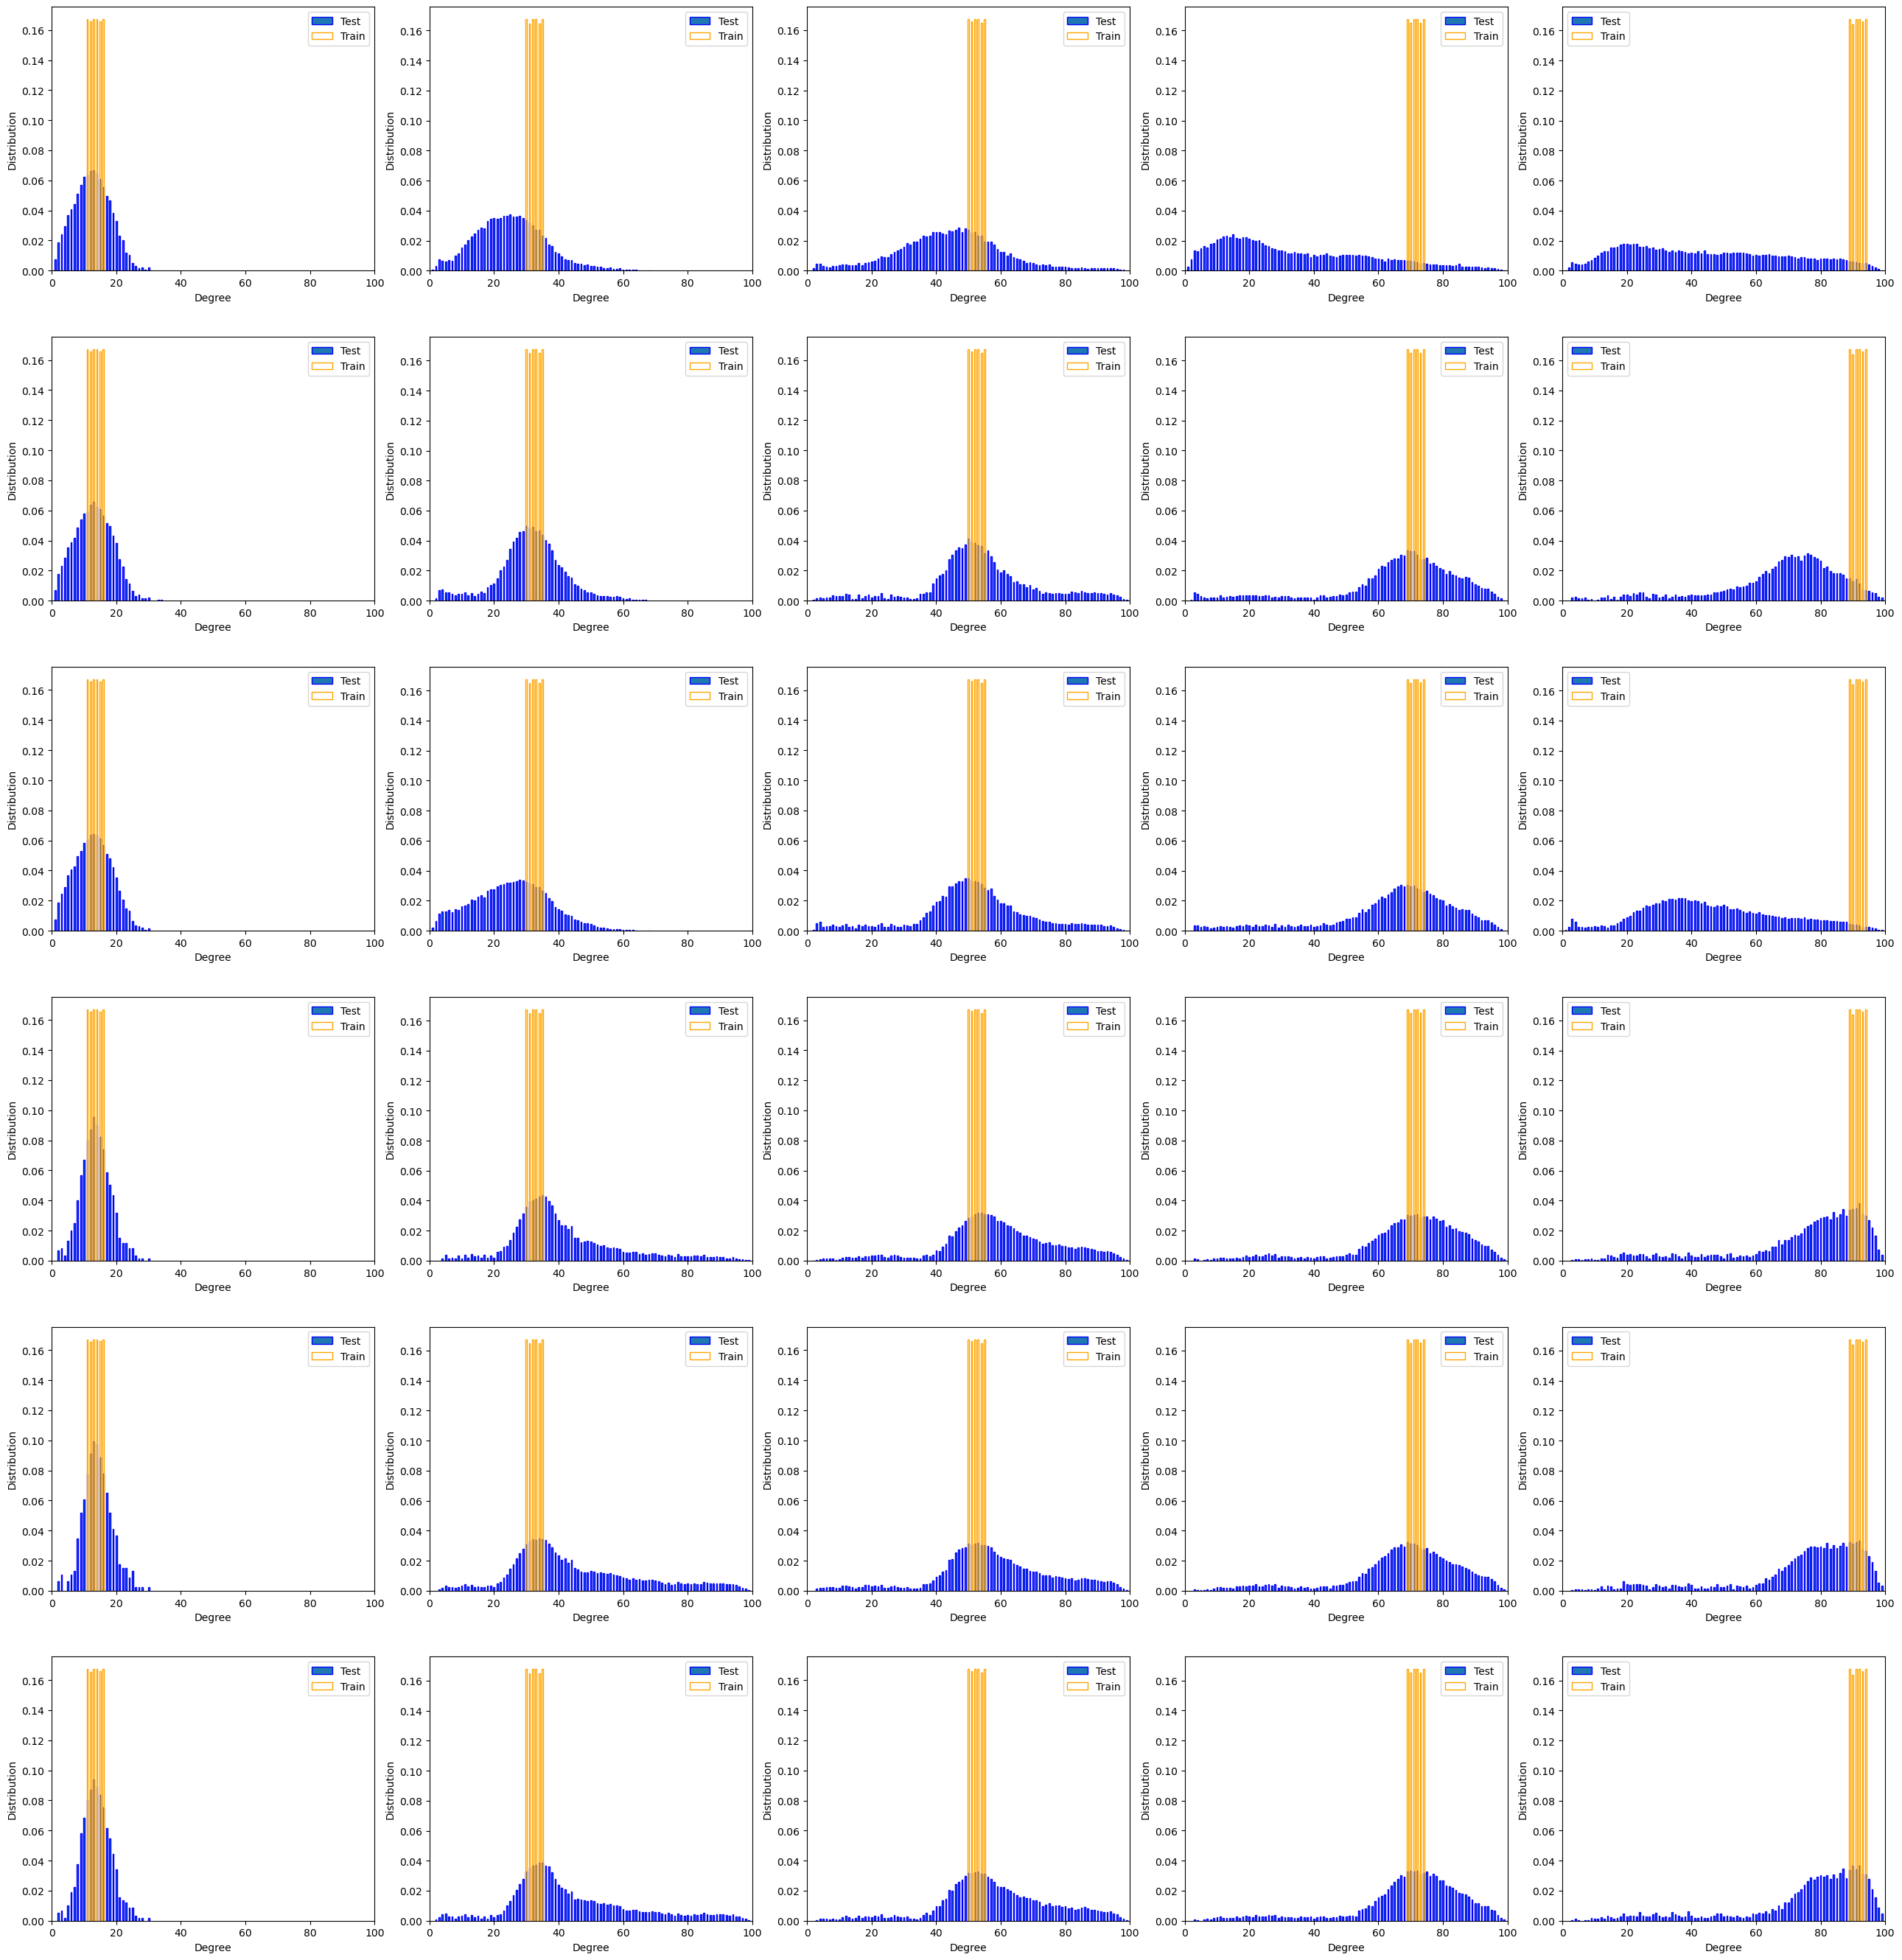

In [25]:
for _ in range(1):
#     X_low100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_pca_sub_50.p", "rb"))['X_low'])
#     data100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_pca_sub_50.p", "rb"))['prop_list'])
#     name_list100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_pca_sub_50.p", "rb"))['name_list'])
    
    X_low100 = np.array(pickle.load(open("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP.p", "rb"))['X_low'])
    data100 = np.array(pickle.load(open("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP.p", "rb"))['prop_list'])
    name_list100 = np.array(pickle.load(open("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP.p", "rb"))['name_list'])
    
#     X_low100 = np.array(pickle.load(open("data_temp/100_list_shell_not_unique_pca_sub_50.p", "rb"))['X_low'])
#     data100 = np.array(pickle.load(open("data_temp/100_list_shell_not_unique_pca_sub_50.p", "rb"))['prop_list'])
#     name_list100 = np.array(pickle.load(open("data_temp/100_list_shell_not_unique_pca_sub_50.p", "rb"))['name_list'])
    
#     X_low100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_no_uni_UNION_pca_sub_80_marginal.p", "rb"))['X_low'])
#     data100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_no_uni_UNION_pca_sub_80_marginal.p", "rb"))['prop_list'])
#     name_list100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_no_uni_UNION_pca_sub_80_marginal.p", "rb"))['name_list'])
    
#     X_low100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_UNION_MEANSTD_sub_50.p", "rb"))['X_low'])
#     data100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_UNION_MEANSTD_sub_50.p", "rb"))['prop_list'])
#     name_list100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_UNION_MEANSTD_sub_50.p", "rb"))['name_list'])

    X_low36 = np.array(pickle.load(open("data_temp/WL_flex_graphs_36_shell_pca_sub_80.p", "rb"))['X_low'])
    data36 = np.array(pickle.load(open("data_temp/WL_flex_graphs_36_shell_pca_sub_80.p", "rb"))['prop_list'])
    name_list36 = np.array(pickle.load(open("data_temp/WL_flex_graphs_36_shell_pca_sub_80.p", "rb"))['name_list'])

    X_low16 = np.array(pickle.load(open("data_temp//WL_flex_graphs_16_shell_pca_sub_250.p", "rb"))['X_low'])
    data16 = np.array(pickle.load(open("data_temp/WL_flex_graphs_16_shell_pca_sub_250.p", "rb"))['prop_list'])
    name_list16 = np.array(pickle.load(open("data_temp/WL_flex_graphs_16_shell_pca_sub_250.p", "rb"))['name_list'])

    cmap = plt.cm.bwr
    
    lower = plt.cm.seismic(np.linspace(0,0.5,30))
    white = plt.cm.seismic(np.ones(5)*0.5)
    upper = plt.cm.seismic(np.linspace(0.5,1,10))
    colors = np.vstack((lower,upper))
    tmap = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map_white', colors)

    f = plt.figure(figsize = (85,70), dpi = 100)

    x_train_100 = np.array([-71.46428771, -36.47970338,  -3.49511905,  30.48946528, 63.77404961])
    y_train_100 = np.array([-8.05574715, -6.92676999, -5.79779284, -4.66881568, -3.53983853])
    
    x_train_16 = [-10.33,-8.61,-6.88,-5.14,-3.41,-1.67,0.04,1.77,3.51,5.25,7.00,8.74,10.52]
    y_train_16 = [-1.60,-1.61,-1.56,-1.50,-1.45,-1.40,-1.35,-1.30,-1.24,-1.23,-1.15,-1.32,-1.30]
    z_train_16 = [-1.60,-1.61,-1.56,-1.50,-1.45,-1.40,-1.35,-1.30,-1.24,-1.23,-1.15,-1.32,-1.30]
       
#     x_train_100 = np.array([-40, 50])
#     y_train_100 = np.array([20, 20])
    
    EPS = float(np.finfo(np.float64).eps)
    minmax_to_check1 = []
    minmax_to_check2 = []
    
number_of_model = 6

for x, _ in tqdm(enumerate(test_path), desc = "outer"):
        test_config = yaml.load(open(os.path.join(_, 'config.yaml'), 'r'), Loader=yaml.FullLoader)
        split = test_config['dataset']['split']
        name = pickle.load(open(os.path.join(_, "name.p"), "rb"))
        try:
            p = pd.read_csv(os.path.join(_, "gt_pts_{}.csv".format(split)), sep='\t', header=None).values
            q = pd.read_csv(os.path.join(_, "pred_pts_{}.csv".format(split)), sep='\t', header=None).values
        except:
            p = pd.read_csv(os.path.join(_, "gt_pts.csv"), sep='\t', header=None).values
            q = pd.read_csv(os.path.join(_, "pred_pts.csv"), sep='\t', header=None).values
        loss_func = nn.KLDivLoss(reduction = 'batchmean')
        XYL = []
        try:
#             print(asdfasdf)
            XYL = pickle.load(open(os.path.join(_, 'XYZL.p'), "rb"))
        except:
            if "exp2_test_100" in _ or "UNION" in _ or 'bimodal' in _:
                if "MSG" in _:
                    graph_num = 1579
                else:
                    graph_num = 3256#1584
                for idx in tqdm(range(graph_num), leave = False):
                    P = torch.Tensor(p)[idx*100 : (idx+1)*100]
                    Q = torch.Tensor(q)[idx*100 : (idx+1)*100]
                    graph_name = name[idx]
                    X = X_low100[np.where(name_list100 == graph_name)[0][0], 0].item()
                    Y = -X_low100[np.where(name_list100 == graph_name)[0][0], 1].item()
                    Z = -X_low100[np.where(name_list100 == graph_name)[0][0], 2].item()
                    
#                     X = data100[np.where(name_list100 == graph_name), 0].item()
#                     Y = -data100[np.where(name_list100 == graph_name), 1].item()
                    loss = loss_func(np.log(Q), P)
                    if np.isinf(loss):
                        print("inf_loss")
                        Q = (Q+EPS)/(Q+EPS).sum(axis = 1).reshape(-1,1)
                        loss = loss_func(np.log(Q), P)
                    XYL += [[X,Y,Z,loss]]
                  
            elif "exp2_test_36" in _:
                if "MSG" in _:
                    graph_num = 1430
                else:
                    graph_num = 1443
                for idx in tqdm(range(graph_num), leave = False):
                    P = torch.Tensor(p)[idx*36 : (idx+1)*36]
                    Q = torch.Tensor(q)[idx*36 : (idx+1)*36]
                    graph_name = name[idx]
                    X = X_low36[np.where(name_list36 == graph_name)[0][0], 0].item()
                    Y = X_low36[np.where(name_list36 == graph_name)[0][0], 1].item()
                    loss = loss_func(np.log(Q), P)
                    XYL += [[X,Y,loss]]
                    
            elif "exp2_test_16" in _:
                if "MSG" in _:
                    graph_num = 1229
                else:
                    graph_num = 1282
                for idx in tqdm(range(graph_num), leave = False):
                    P = torch.Tensor(p)[idx*16 : (idx+1)*16]
                    Q = torch.Tensor(q)[idx*16 : (idx+1)*16]
                    graph_name = name[idx]
                    X = -X_low16[np.where(name_list16 == graph_name)[0][0], 0].item()
                    Y = -X_low16[np.where(name_list16 == graph_name)[0][0], 1].item()
                    Z = -X_low16[np.where(name_list16 == graph_name)[0][0], 2].item()
                    loss = loss_func(np.log(Q), P)
#                     XYL += [[X,Y,loss]]
                    XYL += [[X,Y,Z,loss]]
                    
                    
            XYL = np.array(XYL)
            with open(os.path.join(_, 'XYZL.p'), 'wb') as ff:
                pickle.dump(XYL, ff)
        
        color = np.log10(XYL[:,2])
        minmax_to_check1.append([min(color), max(color)])
        
        if "exp2_test_100" in _ or "UNION" in _:
            bin=30
        elif "test_36" in _:
            bin=20
        else:
            bin=12
        denominator, xedges, yedges = np.histogram2d(XYL[:,0],XYL[:,1],bins=bin)
        nominator, _, _ = np.histogram2d(XYL[:,0],XYL[:,1],bins=[xedges, yedges], weights=color)
        result = nominator / denominator
        result = result.T
        asdf = []
        for i in result:
            for j in i:
                if not np.isnan(j):
                    asdf.append(j)
        minmax_to_check2.append([min(asdf), max(asdf)])
        
m = np.min(np.array(minmax_to_check1).reshape(-1,number_of_model,2), axis=1)
M = np.max(np.array(minmax_to_check1).reshape(-1,number_of_model,2), axis=1)
minmax1 = np.concatenate([m[:,0].reshape(-1,1), M[:,1].reshape(-1,1)], axis=1)
print(minmax1)

m = np.min(np.array(minmax_to_check2).reshape(-1,number_of_model,2), axis=1)
M = np.max(np.array(minmax_to_check2).reshape(-1,number_of_model,2), axis=1)
minmax2 = np.concatenate([m[:,0].reshape(-1,1), M[:,1].reshape(-1,1)], axis=1)
print(minmax2)
        
for x, _ in tqdm(enumerate(test_path), desc = "outer"):
        _ = _.replace("\\", "/")
        train_path = '/'.join(_.split('/')[:-1])
        train_config = yaml.load(open(os.path.join(train_path, 'config.yaml'), 'r'), Loader=yaml.FullLoader)
        test_config = yaml.load(open(os.path.join(_, 'config.yaml'), 'r'), Loader=yaml.FullLoader)
        split = test_config['dataset']['split']
        num_prop = train_config['model']['num_prop']
        try:
            train_stats = pickle.load(open(os.path.join(train_path, "train_stats.p"),"rb"))
            best = train_stats['best_val_loss'][0]
            best_epoch = train_stats['val_loss'].index(best)
        except:
            for kk in os.listdir(train_path):
                if "log" in kk:
                    train_stats = os.path.join(train_path, kk)
            ff = open(train_stats, 'r')
            lines = ff.readlines()
            loss_list = []
            for line in lines:
                if "Best Validation Loss" in line:
                    loss_list.append(float(line.split("=")[-1]))
            best = np.min(loss_list)
            best_epoch = np.where(np.array(loss_list) == best)[0][0]
            ff.close()

        XYL = pickle.load(open(os.path.join(_, 'XYZL.p'), "rb"))
        if "exp2_test_100" in _ or "UNION" in _ or 'bimodal' in _:
            num_node = 100
        elif "exp2_test_36" in _:
            num_node = 36
        elif "exp2_test_16" in _:
            num_node = 16

        color = np.log10(XYL[:,3])

    ################################################################ 1
    
#         ax = f.add_subplot(12,13,int(x/number_of_model) + (x%number_of_model)*13 + 1) 
#         try:
#             plt.plot(train_stats['val_loss'], color='orange')
#             plt.title("best_val_loss: {:10.2e} / epoch : {}".format(best, best_epoch))
#             plt.xlabel("Epoch")
#             plt.ylabel("Validation loss")
#             plt.scatter(best_epoch, best, color='red')
#         except:
#             plt.plot(loss_list, color='orange')
#             plt.title("best_val_loss: {:10.2e} / epoch : {}".format(best, best_epoch))
#             plt.xlabel("Epoch")
#             plt.ylabel("Validation loss")
#             plt.scatter(best_epoch, best, color='red')

#     #################################################################  2

#         try:
#             train_loss2 = np.array(train_stats['train_loss'])
#             train_loss = []
#             for i in range(1000):
#                 mean_loss = np.mean(train_loss2[i*200:(i+1)*200])
#                 if not np.isnan(mean_loss):
#                     train_loss.append(mean_loss)
#             train_loss = np.array(train_loss)
#             plt.plot(train_loss, color='skyblue')
#             best_epoch_t = np.where(train_loss == np.min(train_loss))[0]
#             plt.title("best_val_loss: {:10.2e} / epoch : {} \n best_train_loss : {:10.2e} / epoch: {}".format(best, best_epoch, np.min(train_loss), best_epoch_t[0]))
#             plt.scatter(best_epoch_t, np.min(train_loss), color='blue')
#             plt.xlabel("Epoch")
#             plt.ylabel("Train loss")
#             plt.plot([0.1 for i in range(1000)], c='red', linestyle = '--')
#         except:
#             pass
        
#         train_stats = 0
#         best = 0
#         best_epoch = 0

    ##############################################################  3
        
#         ins = ax.inset_axes([0,0.7,0.25,0.3])
#         ins.scatter(XYL[:,0], XYL[:,1], vmin=minmax[int(x/number_of_model)][0], vmax=minmax[int(x/number_of_model)][1], marker='o',c=color, s=1, cmap=cmap)
#         if num_node==100:
#             ins.scatter(-x_train_100[4-int(x/number_of_model)], -y_train_100[4-int(x/number_of_model)], marker='X', color='yellow', s=150)
#         else:
#             ins.scatter(-x_train_16[12-int(x/number_of_model)], -y_train_16[12-int(x/number_of_model)], marker='X', color='yellow', s=150)
#         ins.set_xticks([])
#         ins.set_yticks([])
#         plt.xticks([])
#         plt.yticks([])

#         plt.title("{}{}".format(minmax[int(x/9)][0], minmax[int(x/9)][1]))

#         plt.scatter(XYL[:,0], XYL[:,1], vmin=minmax1[int(x/number_of_model)][0], vmax=minmax1[int(x/number_of_model)][1], marker='o',c=color, s=1, cmap=cmap)
#         plt.colorbar(label='color')

    ##############################################################  4

#         plt.subplot(11,13,x+1+13*3)
#         plt.scatter(XYL[:,0], XYL[:,2],vmin=min(color), vmax=max(color),marker='o',s=5,color = 'grey')

#         #add curve fitting#
#         popt, pcov = curve_fit(func, XYL[:,0], XYL[:,2], maxfev=100000)
#         plt.plot(np.sort(XYL[:,0]), func(np.sort(XYL[:,0]), *popt), 'b-',)
#         plt.title("a:{:10.5e},b:{:10.5e},c:{:10.5e}".format(popt[0],popt[1],popt[2]))

#         plt.xlabel("CC")
#         plt.ylabel("Loss")

#                             ########################################  5

#         plt.subplot(11,13,x+1+13*4)
#         plt.scatter(XYL[:,1], XYL[:,2],vmin=min(color), vmax=max(color),marker='o', s=5,color = 'grey')

#         #add curve fitting#
#         popt, pcov = curve_fit(func, XYL[:,1], XYL[:,2], maxfev=100000)
#         plt.plot(np.sort(XYL[:,1]), func(np.sort(XYL[:,1]), *popt), 'b-',)
#         plt.title("a:{:10.3e},b:{:10.3e},c:{:10.3e}".format(popt[0],popt[1],popt[2]))

#         plt.xlabel("Path")
#         plt.ylabel("Loss")


    ################################################################  6

#         ins = ax.inset_axes([0,0.7,0.25,0.3])
#         ax_inset1 = f.add_axes([0.1, 0.15, 0.4, 0.4], anchor='NW', projection='3d')
        ax = f.add_subplot(12,13,int(x/number_of_model) + (x%number_of_model)*13 + 1, projection='3d')

        if "test_100" in _ or "UNION" in _ or 'bimodal' in _:
            bin=30
        elif "test_36" in _:
            bin=20
        else:
            bin=12
        print(XYL.shape)
        denominator, xedges, yedges = np.histogram2d(XYL[:,0],XYL[:,1],bins=bin)
        nominator, _, _ = np.histogram2d(XYL[:,0],XYL[:,1],bins=[xedges, yedges], weights=color)

        result = nominator / denominator
        result = result.T

        X, Y = np.meshgrid(xedges, yedges)
#         ins.pcolormesh(X, Y,result, cmap=cmap, vmin=minmax2[int(x/number_of_model)][0], vmax=minmax2[int(x/number_of_model)][1])
        ax.scatter(-XYL[:,0], -XYL[:,1], -XYL[:,2], marker='o', s=6, c=color, cmap=cmap)
    
        elev = 90
        azim = 90
        ax.view_init(elev, azim)
        
#         if num_node==100:
#             ins.scatter(-x_train_100[4-int(x/number_of_model)], -y_train_100[4-int(x/number_of_model)], marker='X', color='yellow', s=30)

#         elif num_node==16:
#             ins.scatter(-x_train_16[12-int(x/number_of_model)], -y_train_16[12-int(x/number_of_model)], marker='X', color='yellow', s=30)
#         ins.set_xticks([])
#         ins.set_yticks([])
#         ins.set_xlim(np.min(X)-1,np.max(X)+1)
#         ins.set_ylim(np.min(Y)-0.5,np.max(Y)+0.5)     
#         ins.set_facecolor('black')


    ################################################################  7

#         plt.subplot(11,13,x+1+13*6)
#         new_scatter_X = np.zeros([X.shape[0], X.shape[1]-1])
#         for i in range(X.shape[0]):
#             for j in range(X.shape[1]-1):
#                 new_scatter_X[i,j] = (X[i,j] + X[i,j+1]) / 2
#         plt.scatter(new_scatter_X[:-1], result, color = 'grey')

#         #add curve fitting#
#         x_for_fit = []
#         y_for_fit =[]
#         for i,j in zip(new_scatter_X[:-1], result):
#             for ii,jj in zip(i,j):
#                 if not math.isnan(jj):
#                     x_for_fit.append(ii)
#                     y_for_fit.append(jj)

#         popt, pcov = curve_fit(func, x_for_fit, y_for_fit, maxfev=100000)
#         plt.plot(np.sort(x_for_fit), func(np.sort(x_for_fit), *popt), 'b-',)
#         plt.title("a:{:10.5e},b:{:10.5e},c:{:10.5e}".format(popt[0],popt[1],popt[2]))

                                 ########################################  8

#         plt.subplot(11,13,x+1+13*7)
#         new_scatter_Y = np.zeros([Y.T.shape[0], Y.T.shape[1]-1])
#         for i in range(Y.T.shape[0]):
#                 for j in range(Y.T.shape[1]-1):
#                     new_scatter_Y[i,j] = (Y.T[i,j] + Y.T[i,j+1]) / 2
#         plt.scatter(new_scatter_Y[:-1], result.T, color = 'grey')

#         #add curve fitting#
#         x_for_fit = []
#         y_for_fit =[]
#         for i,j in zip(new_scatter_Y[:-1], result.T):
#             for ii,jj in zip(i,j):
#                 if not math.isnan(jj):
#                     x_for_fit.append(ii)
#                     y_for_fit.append(jj)

#         popt, pcov = curve_fit(func, x_for_fit, y_for_fit, maxfev=100000)
#         plt.plot(np.sort(x_for_fit), func(np.sort(x_for_fit), *popt), 'b-',)
#         plt.title("a:{:10.3e},b:{:10.3e},c:{:10.3e}".format(popt[0],popt[1],popt[2]))

f2 = plt.figure(figsize = (85,70), dpi = 100)

for x, path in tqdm(enumerate(test_path)):
    XYL = np.array(pickle.load(open(os.path.join(path, "XYZL.p"), "rb")))
    name = pickle.load(open(os.path.join(path, "name.p"), "rb"))
    min_L = np.min(np.log10(XYL[:,3]))
    max_L = np.max(np.log10(XYL[:,3]))
    
    threshold = min_L+0.3*(max_L-min_L)
    graph_index_toplot = np.where(np.log10(XYL[:,3]) < threshold)[0]
    
    if "test_16" in path:
        num_node = 16
    elif "test_36" in path:
        num_node = 36
    elif "test_100"  in path or "UNION" in path or 'bimodal' in path:
        num_node = 100
    
    deg_list = []
    cc_list = []
    path_list = []
    for index in graph_index_toplot:
        graph_name = name[index]
        if num_node==16:
            for _ in os.listdir("data_temp/exp2_test_16_0.3"):
                if graph_name in _:
                    graph_path = os.path.join("data_temp/exp2_test_16_0.3", _)
                    break
            graph = pickle.load(open(graph_path, "rb"))
            J = graph['J'].todense()
            G = nx.from_numpy_array(J)
            _, deg, _ = degree(G)
            cc, path = nx.average_clustering(G), nx.average_shortest_path_length(G)
            deg_list+=deg
            cc_list.append(cc)
            path_list.append(path)
      
        elif num_node==100:
#             for _ in os.listdir("data_temp/exp2_test_100_0.3"):
#             for _ in os.listdir("data_temp/WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal"):
            for _ in os.listdir("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP_JB_2"): 
                if graph_name in _:
#                     graph_path = os.path.join("data_temp/exp2_test_100_0.3", _)
#                     graph_path = os.path.join("data_temp/WL_flex_graphs_100_shell_UNION_pca_sub_80_marginal", _)
                    graph_path = os.path.join("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP_JB_2", _)
                    break
            graph = pickle.load(open(graph_path, "rb"))
            J = graph['J'].todense()
            G = nx.from_numpy_array(J)
            cc, path = nx.average_clustering(G), nx.average_shortest_path_length(G)
            _, deg, _ = degree(G)
            deg_list+=deg
            cc_list.append(cc)
            path_list.append(path)
            
        elif num_node==36:
            for _ in os.listdir("data_temp/exp2_test_36_0.3"):
                if graph_name in _:
                    graph_path = os.path.join("data_temp/exp2_test_36_0.3", _)
                    break
            graph = pickle.load(open(graph_path, "rb"))
            J = graph['J'].todense()
            G = nx.from_numpy_array(J)
            _, deg, _ = degree(G)            
            cc, path = nx.average_clustering(G), nx.average_shortest_path_length(G)
            deg_list+=deg
            cc_list.append(cc)
            path_list.append(path)
            
    ax = f2.add_subplot(12, 13, int(x / number_of_model) + (x % number_of_model) * 13 + 1)
#     ax = f.add_subplot(12, 13, int(x / number_of_model) + (x % number_of_model) * 13 + 1 + 13)
    a = Counter(deg_list)
#     a = Counter(cc_list)
#     a = Counter(path_list)
    sum_count = sum(a.values())
    plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=True, edgecolor='blue', width=0.4,label='Test')
#     plt.hist(cc_list, stacked=True, density=True)
    plt.ylabel("Distribution")
    plt.xlabel("Degree")
    
#     kk = int(x//3)
#     train_deg_list = pickle.load(open("data_temp/unique_graph_16/unique_degree_shell/({},{},{}).p".format(kk+3, kk+2, kk+1), "rb"))    
#     plt.xlim(0, 100)
    
    if num_node == 16:
        train_deg_list = pickle.load(open("data_temp/unique_graph_16/unique_degree_shell/({},{},{}).p".format(int(x/6)+3, int(x/6)+2, int(x/6)+1), "rb"))  
        plt.xlim(0, 16)
    elif num_node == 100:
        train_deg_list = pickle.load(open("data_temp/unique_graph_100/group_{}_no_uni.p".format(4-int(x/number_of_model)), "rb"))
        train_deg_list = pickle.load(open("data_temp/unique_graph_100/group_{}.p".format(4-int(x/number_of_model)), "rb"))
        train_cc_list = pickle.load(open("data_temp/unique_graph_100/group_{}_CC.p".format(4-int(x/number_of_model)), "rb"))
        train_path_list = pickle.load(open("data_temp/unique_graph_100/group_{}_PATH.p".format(4-int(x/number_of_model)), "rb"))
        plt.xlim(0, 100)
    elif num_node == 36:
        plt.xlim(0, 36)
        
    a = Counter(train_deg_list)
#     train_cc_list2 = []
#     for i in train_cc_list:
#         train_cc_list2.append(round(i, 2))
    
#     a = Counter(train_cc_list)
#     a = Counter(round(train_path_list, 2))
    sum_count = sum(a.values())
    plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=False, edgecolor='orange', width=0.4,label='Train')
#     plt.hist(train_cc_list, stacked=True, density=True)
    plt.legend()

plt.subplots_adjust(hspace=0.25, wspace=0.17)
print(minmax1, minmax2)

In [26]:
save_fig(f, r"C:\Users\mokss\Dropbox\Elements\PCA_expension\exp2_V100_0.3to_V100_0.3_pca_bimodal.pdf")
save_fig(f2, r"C:\Users\mokss\Dropbox\Elements\PCA_expension\exp2_V100_0.3to_V100_0.3_pca_bimodal_degree_dist.pdf")

In [ ]:
f2.savefig(r"C:\Users\mokss\Dropbox\Elements\exp2_1_random_graph\exp2_2_V16_0.75toV16_0.75_add,att,sk_bin12_PCA_distribution.pdf", bbox_inches='tight')

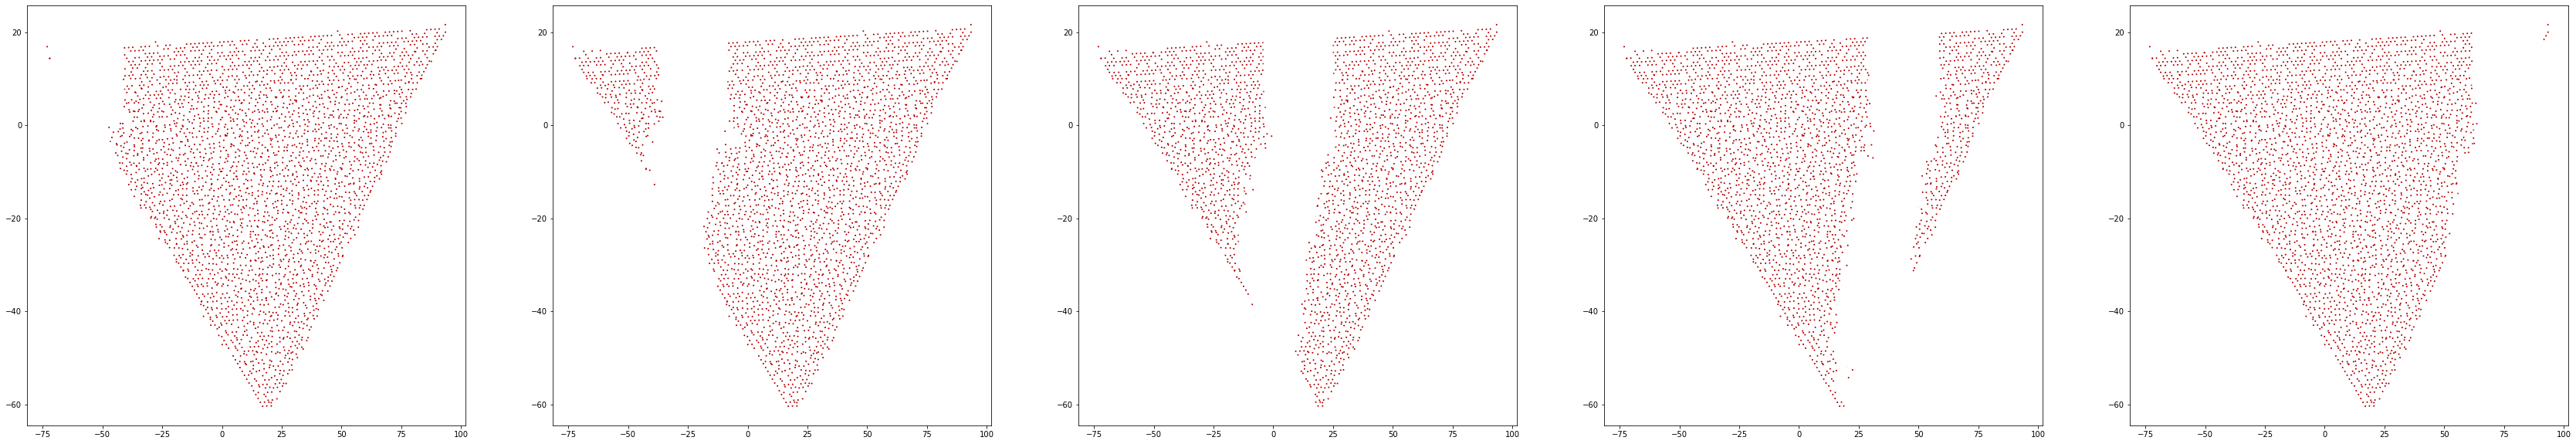

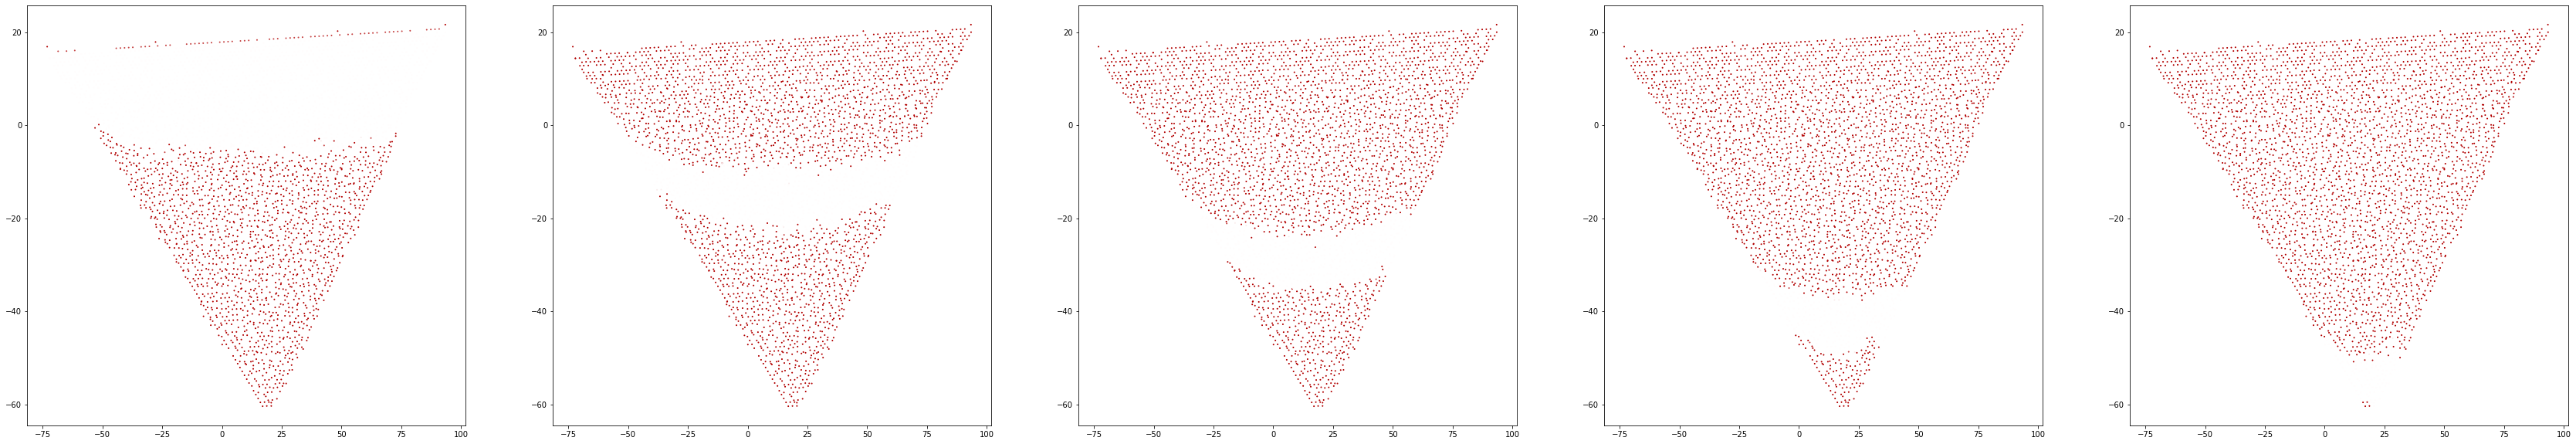

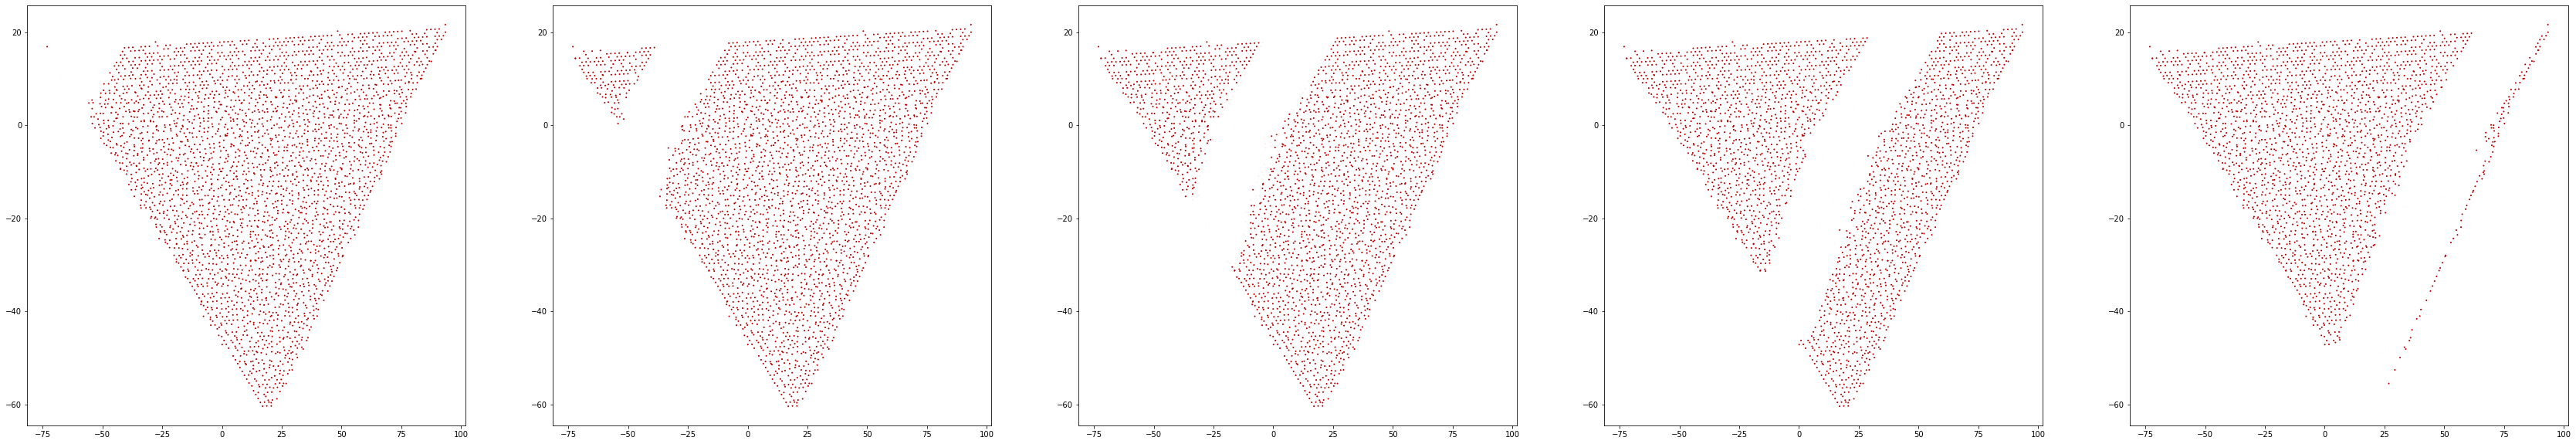

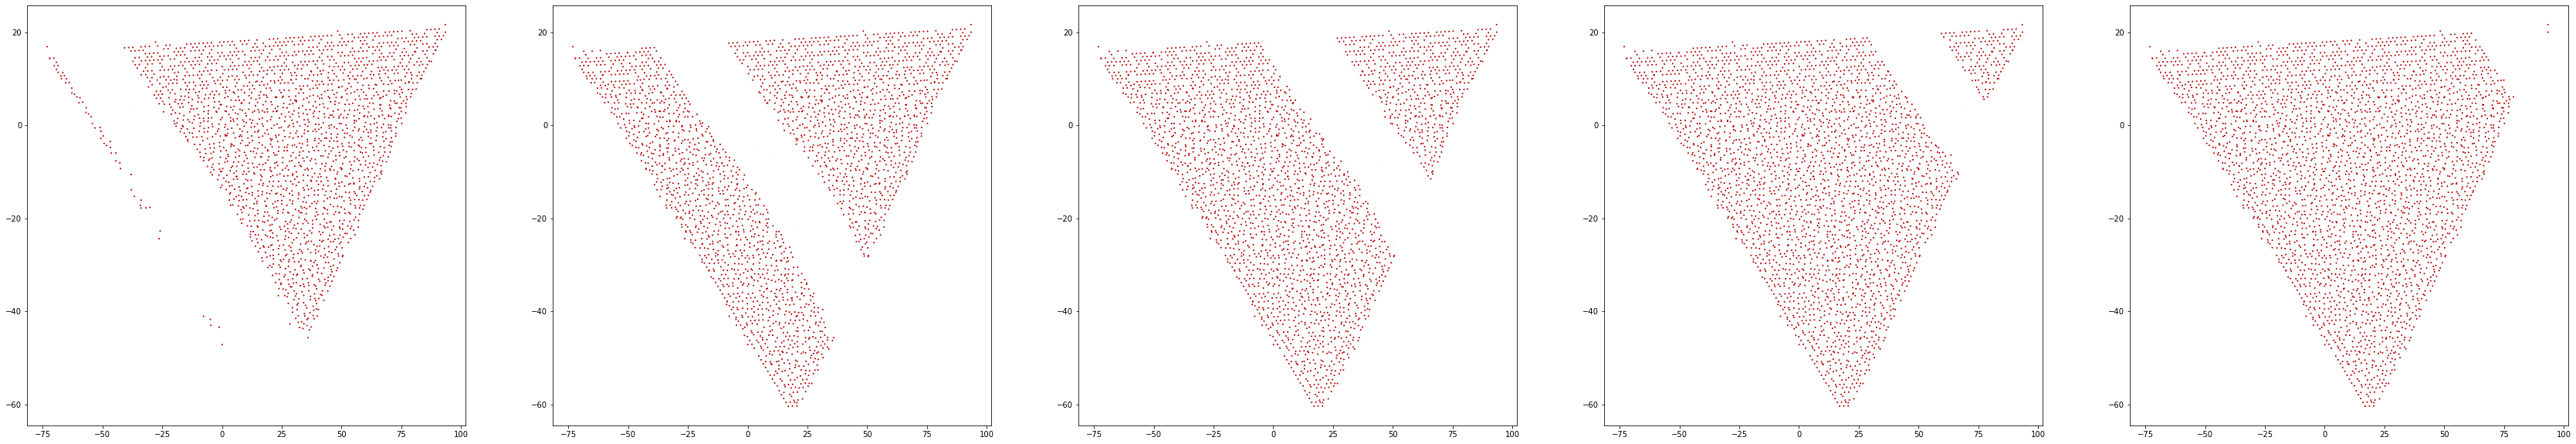

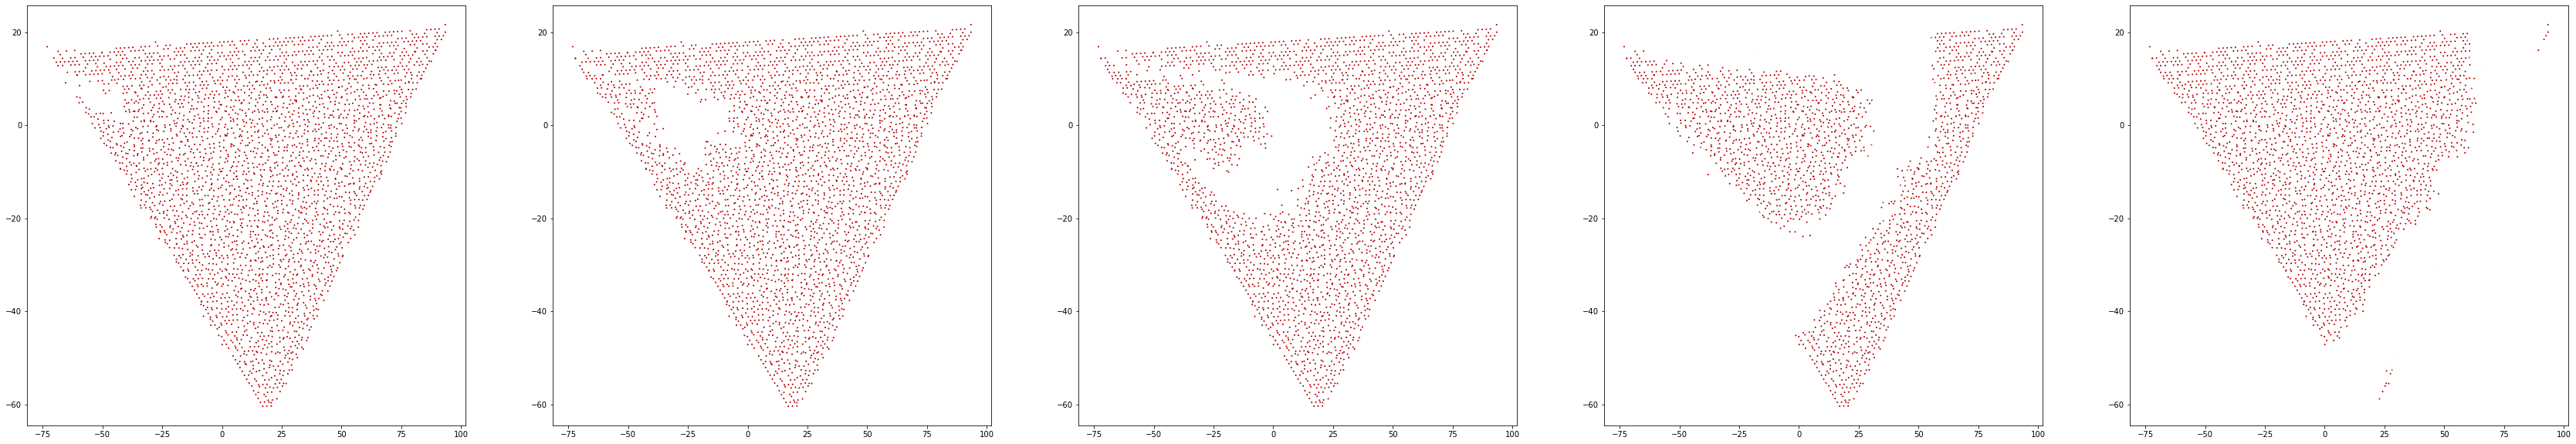

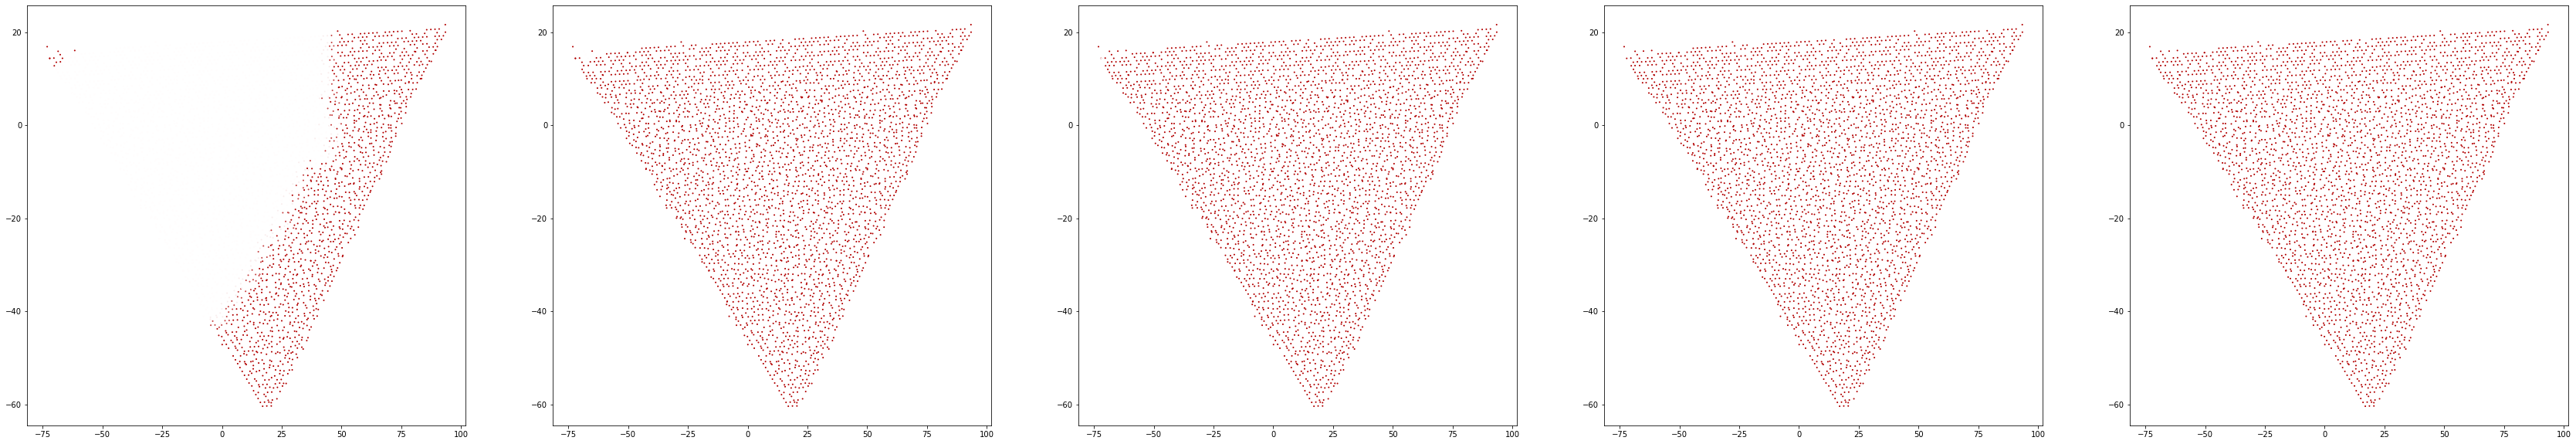

In [10]:
X_low100 = np.array(pickle.load(open("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP.p", "rb"))['X_low'])
data100 = np.array(pickle.load(open("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP.p", "rb"))['prop_list'])
name_list100 = np.array(pickle.load(open("data_temp/WS_flex_graph_100_bimodal_pca_sub_80_SP.p", "rb"))['name_list'])
cmap = plt.cm.bwr


white = plt.cm.seismic(np.ones(150)*0.5)
upper = plt.cm.seismic(np.ones(10)*0.9)

colors = np.vstack((upper,white,upper))
tmap = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map_white', colors)


for i in range(6):
    PROPIDX=i
    M = max(data100[:,PROPIDX])
    m = min(data100[:,PROPIDX])
    tik = M-m

    plt.figure(figsize=(120,10))

    for ii in range(5):
        plt.subplot(1,10,ii+1)
        plt.scatter(X_low100[:,0], -X_low100[:,1], cmap=tmap, c=data100[:,PROPIDX], s=1, vmin=m + tik*ii*0.2, vmax = m + tik*(ii+1)*0.2)
        